# 读取数据

In [1]:
from gspan_mining.config import parser
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
from random import random
import sys

import numpy as np
import pandas as pd


import random 
from tqdm import tqdm

In [2]:
import os
os.getcwd()

'/Users/tangting/Project/gSpan'

# 1. 生成 Vertex 数据集

In [3]:
vertex_count = 1000
origin_ids = []
int_fetaures = []
float_fetaures = []
node_label_0 = []
node_label_1 = []
for i in range(vertex_count):
    origin_id = random.randint(1000000,100000000)
    if origin_id not in origin_ids:
        origin_ids.append(origin_id)
        int_fetaures.append([random.randint(10,100),random.randint(200,300)])
        float_fetaures.append([random.random()*10,random.random()*2000])
        node_label_0.append(int(random.random()*2))    
        node_label_1.append(int(random.random()*2))



# vertext_tb = pd.DataFrame(data=[origin_ids,int_fetaures,float_fetaures],columns=["origin_id","int_fetaures","float_fetaures"])
vertext_tb = pd.DataFrame({"origin_id" : origin_ids, \
                            "int_fetaures": int_fetaures, \
                            "float_fetaures" :float_fetaures,
                            "node_label_0":node_label_0,\
                           "node_label_1":node_label_1     })
vertext_tb["id"] = vertext_tb.index
vertext_tb.to_csv("data/vertex_data.csv",index=False,header=True)
vertext_tb


,origin_id,int_fetaures,float_fetaures,node_label_0,node_label_1,id
0,52913290,"[42, 208]","[0.2454909619968726, 1307.2011994037516]",1,1,0
1,93646093,"[39, 248]","[0.7541657659209611, 1363.0114087341558]",0,0,1
2,40314607,"[28, 228]","[0.5052281934221436, 1229.3731617196315]",0,1,2
3,24145916,"[56, 264]","[2.80854952588087, 1595.87503449946]",0,0,3
4,18161028,"[80, 202]","[8.264901190103746, 1701.0297639857856]",0,0,4
...,...,...,...,...,...,...
995,49322560,"[18, 270]","[0.19395678145262774, 1942.5509178158272]",1,1,995
996,13128935,"[86, 218]","[8.453353272818534, 1015.6500338982062]",0,1,996
997,17337074,"[18, 294]","[8.752197791817641, 1040.5840107607185]",1,0,997
998,86864896,"[74, 225]","[7.589070151722447, 1290.2239330452642]",1,0,998


# 2. 生成 Edge 数据集


In [4]:
vertex_count = len(origin_ids)
edge_count = vertex_count * 10
edge_src_ids = []
edge_dst_ids = []
edge_types = []
for i in range(edge_count):
    src_rand_id = random.randint(0,vertex_count-1)
    dst_rand_id = random.randint(0,vertex_count-1)
    if src_rand_id != dst_rand_id:
        src_id = origin_ids[src_rand_id]
        edge_src_ids.append(src_id)
        dst_id = origin_ids[dst_rand_id]
        edge_dst_ids.append(dst_id)
        edge_types.append(random.randint(0,5))

# vertext_tb = pd.DataFrame(data=[origin_ids,int_fetaures,float_fetaures],columns=["origin_id","int_fetaures","float_fetaures"])
edge_tb = pd.DataFrame({"src_origin_id" : edge_src_ids,"dst_origin_id": edge_dst_ids,"edge_type" :edge_types})

edge_tb.to_csv("data/edge_data.csv",index=False,header=True)


In [5]:

edge_tb_src = edge_tb.merge(vertext_tb[["id","origin_id"]], \
                            left_on="src_origin_id", \
                            right_on="origin_id", \
                            how="left") \
                                [["src_origin_id","dst_origin_id","edge_type","id"]].rename(columns = {"id":"src_id"})

edge_tb_dst = edge_tb_src.merge(vertext_tb[["id","origin_id"]], \
                            left_on="dst_origin_id", \
                            right_on="origin_id", \
                            how="left") \
                                [["src_origin_id","dst_origin_id","edge_type","src_id","id"]].rename(columns = {"id":"dst_id"})

edge_end = edge_tb_dst[["edge_type","src_id","dst_id"]]


edge_end
# edge_tb


,edge_type,src_id,dst_id
0,2,776,9
1,2,935,20
2,0,332,528
3,3,701,553
4,4,379,63
...,...,...,...
9988,2,292,376
9989,2,924,442
9990,1,354,355
9991,0,37,604


# 3.找到 origin_id => subgraph


In [6]:
# vertext_end, edge_end

vertext_end = vertext_tb[["id", "int_fetaures", "float_fetaures", "node_label_0", "node_label_1"]]
origin_ids = vertext_end[(vertext_end["node_label_0"]==0)&(vertext_end["node_label_1"])]
top1_neigh = pd.merge(origin_ids,edge_end,left_on="id",right_on="src_id").rename(columns={"id":"graph_id"})
top2_neigh = pd.merge(top1_neigh[["graph_id","dst_id"]].rename(columns={"dst_id":"id"}).drop_duplicates(),edge_end,left_on="id",right_on="src_id")
top3_neigh = pd.merge(top2_neigh[["graph_id","dst_id"]].rename(columns={"dst_id":"id"}).drop_duplicates(),edge_end,left_on="id",right_on="src_id")
top3_neigh.drop_duplicates()
# pd.merge(top1_neigh,edge_end,left_on="dst_id",right_on="src_id").rename(columns={"id":"graph_id"})
# origin_ids.join(edge_end,left)

,graph_id,id,edge_type,src_id,dst_id
0,2,373,2,373,294
1,2,373,5,373,248
2,2,373,0,373,538
3,2,373,4,373,29
4,2,373,4,373,197
...,...,...,...,...,...
220595,762,540,4,540,287
220596,762,540,4,540,350
220597,762,540,5,540,880
220598,762,540,3,540,718


In [7]:
graphs = pd.concat([top1_neigh[["graph_id","src_id","dst_id","edge_type"]],
            top2_neigh[["graph_id","src_id","dst_id","edge_type"]],
                top3_neigh[["graph_id","src_id","dst_id","edge_type"]]],axis=0).drop_duplicates()
origin_ids["graph_id"] = origin_ids["id"]
select_vertexes = pd.concat([graphs[["graph_id","src_id"]].rename(columns={"src_id":"id"}),
                    graphs[["graph_id","dst_id"]].rename(columns={"dst_id":"id"}),
                    origin_ids[["graph_id","id"]]],axis=0).drop_duplicates()


select_edges = graphs


/var/folders/23/8rnl11914v1_gmqkg83jtt8h0000gn/T/ipykernel_28273/2736574741.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  origin_ids["graph_id"] = origin_ids["id"]


## 过滤掉周围邻居没有黑节点的子图


In [8]:
select_vertexes = pd.merge(select_vertexes,vertext_end[["id","node_label_0","node_label_1"]],how="left")

In [9]:
# 修改图的编号

graph_id_map = select_vertexes[["graph_id"]].drop_duplicates().reset_index(drop=True)
graph_id_map["graph_new_id"] = graph_id_map.index

graph_id_map_end = graph_id_map.rename(columns={"graph_id":"origin_id"}).rename(columns={"graph_new_id":"graph_id"})
graph_id_map_end

,origin_id,graph_id
0,2,0
1,19,1
2,20,2
3,21,3
4,31,4
...,...,...
229,988,229
230,989,230
231,990,231
232,994,232


In [10]:
select_vertexes = pd.merge(select_vertexes,graph_id_map,on="graph_id").drop(columns=["graph_id"]).rename(columns = {"graph_new_id":"graph_id"})
select_vertexes

,id,node_label_0,node_label_1,graph_id
0,2,0,1,0
1,491,1,1,0
2,102,1,1,0
3,285,0,0,0
4,441,0,1,0
...,...,...,...,...
146582,16,0,0,233
146583,951,0,0,233
146584,366,0,1,233
146585,362,0,0,233


In [11]:

select_vertexes.to_csv("graphdata/vertexes.csv",index=False,header=True)

edge_end.to_csv("graphdata/edges.csv",index=False,header=True)
graph_id_map_end.to_csv("graphdata/graph_map.csv",index=False,header=True)

# 4. 子图挖掘

100%|██████████| 234/234 [00:05<00:00, 44.31it/s]


t # 0
v 0 1
v 1 3
v 2 1
v 3 1
e 0 1 4
e 1 0 4
e 1 2 2
e 2 3 4

Support: 107


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


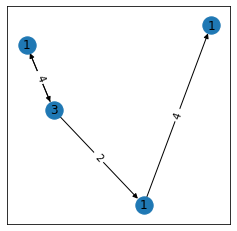

where: [0, 1, 18, 19, 20, 22, 23, 24, 25, 30, 31, 33, 35, 41, 42, 46, 48, 52, 53, 56, 64, 65, 66, 69, 71, 73, 75, 77, 79, 82, 85, 86, 87, 89, 92, 95, 96, 98, 100, 101, 103, 105, 107, 108, 109, 110, 111, 113, 115, 119, 122, 127, 128, 129, 130, 132, 133, 135, 136, 138, 139, 140, 142, 143, 144, 145, 146, 148, 151, 153, 155, 157, 160, 161, 162, 163, 169, 174, 176, 177, 178, 180, 184, 186, 187, 188, 190, 193, 195, 196, 199, 200, 202, 204, 206, 212, 215, 216, 217, 221, 223, 226, 227, 228, 229, 230, 232]

-----------------

t # 1
v 0 1
v 1 3
v 2 1
v 3 2
e 0 1 4
e 1 0 4
e 1 2 2
e 2 3 5

Support: 102


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


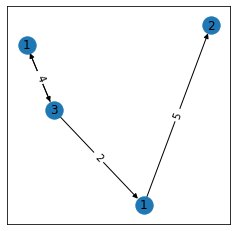

where: [0, 1, 18, 19, 20, 22, 23, 24, 25, 30, 31, 33, 35, 41, 42, 46, 48, 52, 53, 56, 64, 69, 71, 73, 75, 77, 79, 82, 84, 85, 86, 87, 89, 92, 95, 96, 99, 102, 103, 105, 107, 109, 110, 111, 112, 113, 115, 119, 122, 127, 129, 130, 132, 133, 135, 136, 138, 139, 140, 142, 143, 146, 148, 151, 153, 155, 160, 161, 162, 163, 168, 169, 174, 177, 178, 180, 185, 186, 187, 188, 193, 195, 196, 199, 200, 202, 204, 206, 212, 213, 215, 216, 217, 220, 221, 226, 227, 228, 229, 230, 232, 233]

-----------------

t # 2
v 0 1
v 1 3
v 2 1
v 3 2
v 4 3
e 0 1 4
e 1 0 4
e 1 2 2
e 2 3 5
e 3 4 4

Support: 100


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


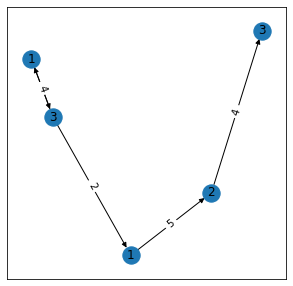

where: [0, 1, 18, 19, 20, 22, 23, 24, 25, 30, 31, 33, 35, 41, 42, 46, 48, 52, 53, 56, 64, 69, 71, 73, 75, 77, 79, 82, 84, 85, 86, 87, 92, 95, 96, 99, 102, 103, 105, 107, 109, 110, 111, 112, 113, 115, 119, 122, 127, 129, 130, 132, 133, 135, 136, 138, 139, 140, 142, 143, 146, 148, 151, 153, 155, 160, 161, 162, 163, 169, 174, 177, 178, 180, 185, 186, 187, 188, 193, 195, 196, 199, 200, 202, 204, 206, 212, 213, 215, 216, 217, 220, 221, 226, 227, 228, 229, 230, 232, 233]

-----------------

t # 3
v 0 1
v 1 3
v 2 1
v 3 3
e 0 1 4
e 1 0 4
e 1 2 2
e 2 3 2

Support: 104


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


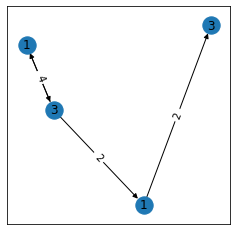

where: [0, 1, 19, 20, 22, 23, 24, 30, 31, 33, 41, 42, 46, 48, 52, 53, 56, 64, 65, 66, 71, 73, 75, 77, 82, 84, 85, 87, 89, 92, 95, 96, 98, 99, 100, 101, 102, 103, 105, 107, 109, 110, 111, 112, 113, 115, 119, 122, 126, 127, 128, 129, 130, 132, 133, 135, 136, 138, 139, 140, 142, 143, 144, 145, 146, 148, 149, 151, 153, 157, 160, 161, 162, 163, 169, 175, 176, 177, 178, 180, 184, 185, 186, 187, 188, 190, 193, 195, 196, 200, 202, 204, 212, 215, 216, 220, 221, 223, 226, 227, 228, 230, 232, 233]

-----------------

t # 4
v 0 1
v 1 3
v 2 1
v 3 3
e 0 1 4
e 1 0 4
e 1 2 2
e 2 3 2
e 3 2 4

Support: 104


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


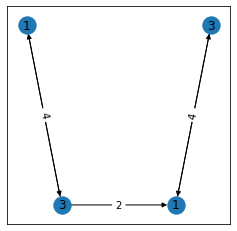

where: [0, 1, 19, 20, 22, 23, 24, 30, 31, 33, 41, 42, 46, 48, 52, 53, 56, 64, 65, 66, 71, 73, 75, 77, 82, 84, 85, 87, 89, 92, 95, 96, 98, 99, 100, 101, 102, 103, 105, 107, 109, 110, 111, 112, 113, 115, 119, 122, 126, 127, 128, 129, 130, 132, 133, 135, 136, 138, 139, 140, 142, 143, 144, 145, 146, 148, 149, 151, 153, 157, 160, 161, 162, 163, 169, 175, 176, 177, 178, 180, 184, 185, 186, 187, 188, 190, 193, 195, 196, 200, 202, 204, 212, 215, 216, 220, 221, 223, 226, 227, 228, 230, 232, 233]

-----------------

t # 5
v 0 1
v 1 3
v 2 1
v 3 2
e 0 1 4
e 1 0 4
e 1 2 2
e 1 3 2

Support: 106


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


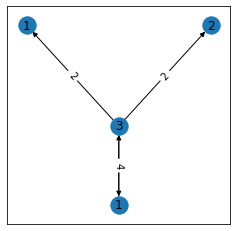

where: [0, 1, 18, 19, 20, 23, 25, 30, 31, 33, 41, 42, 46, 48, 53, 56, 64, 65, 69, 71, 73, 75, 77, 82, 84, 85, 86, 87, 89, 92, 95, 96, 98, 99, 101, 102, 103, 105, 107, 108, 109, 110, 111, 112, 113, 115, 119, 122, 126, 127, 130, 133, 135, 136, 138, 139, 140, 142, 143, 145, 146, 148, 149, 151, 153, 157, 159, 160, 161, 162, 163, 168, 169, 174, 175, 176, 177, 178, 180, 184, 186, 187, 188, 190, 193, 195, 196, 199, 200, 202, 204, 212, 213, 215, 216, 217, 220, 221, 223, 226, 227, 228, 229, 230, 232, 233]

-----------------

t # 6
v 0 1
v 1 3
v 2 2
v 3 3
e 0 1 4
e 1 0 4
e 1 2 2
e 2 3 3

Support: 114


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


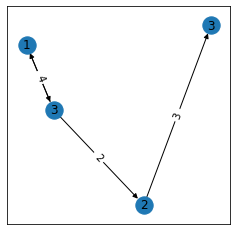

where: [0, 1, 2, 10, 12, 13, 18, 19, 20, 23, 30, 31, 33, 42, 48, 51, 53, 55, 56, 61, 64, 65, 69, 71, 73, 74, 75, 77, 78, 82, 84, 85, 86, 87, 89, 93, 95, 96, 98, 99, 101, 102, 103, 105, 107, 108, 109, 110, 112, 113, 115, 119, 122, 126, 127, 130, 133, 135, 136, 138, 139, 140, 142, 143, 145, 146, 147, 148, 149, 151, 153, 154, 157, 159, 160, 161, 162, 163, 168, 169, 171, 174, 175, 176, 177, 178, 180, 184, 186, 187, 188, 189, 190, 193, 195, 196, 198, 199, 200, 202, 205, 212, 213, 216, 217, 221, 223, 226, 227, 228, 229, 230, 232, 233]

-----------------

t # 7
v 0 1
v 1 3
v 2 2
v 3 3
v 4 1
e 0 1 4
e 1 0 4
e 1 2 2
e 2 3 3
e 3 4 4

Support: 107


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


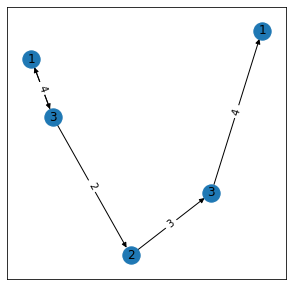

where: [0, 1, 2, 10, 12, 13, 18, 19, 20, 23, 30, 31, 42, 48, 51, 53, 55, 56, 61, 64, 65, 69, 71, 73, 75, 77, 78, 82, 84, 85, 86, 87, 89, 93, 95, 96, 98, 99, 101, 102, 103, 105, 107, 108, 109, 110, 112, 115, 119, 122, 126, 127, 130, 133, 135, 136, 138, 139, 140, 142, 145, 146, 147, 148, 149, 151, 154, 159, 160, 161, 162, 163, 168, 169, 171, 174, 175, 176, 177, 178, 180, 184, 186, 187, 188, 190, 193, 195, 196, 198, 199, 200, 202, 205, 212, 213, 216, 217, 221, 223, 226, 227, 228, 229, 230, 232, 233]

-----------------

t # 8
v 0 1
v 1 3
v 2 2
v 3 3
v 4 2
e 0 1 4
e 1 0 4
e 1 2 2
e 2 3 3
e 3 4 5

Support: 103


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


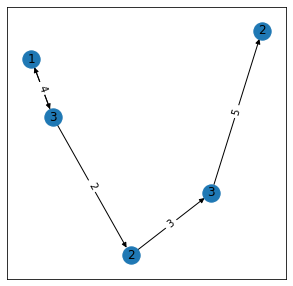

where: [0, 1, 12, 13, 18, 19, 20, 23, 30, 31, 33, 42, 48, 51, 53, 55, 56, 61, 64, 65, 69, 71, 73, 74, 75, 77, 78, 82, 84, 85, 86, 87, 93, 95, 96, 99, 101, 102, 103, 105, 107, 108, 109, 110, 112, 115, 119, 126, 127, 133, 135, 136, 139, 142, 145, 146, 147, 148, 151, 153, 154, 157, 159, 160, 161, 162, 163, 168, 169, 171, 174, 175, 176, 177, 178, 180, 184, 186, 187, 188, 189, 190, 193, 195, 196, 198, 199, 200, 202, 205, 212, 213, 216, 217, 221, 223, 226, 227, 228, 229, 230, 232, 233]

-----------------

t # 9
v 0 1
v 1 3
v 2 3
v 3 1
e 0 1 4
e 1 0 2
e 1 2 5
e 2 3 5

Support: 101


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


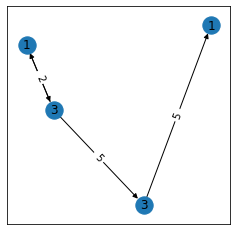

where: [0, 1, 4, 7, 10, 11, 12, 15, 24, 27, 28, 30, 31, 33, 37, 38, 39, 44, 46, 51, 52, 54, 62, 63, 64, 65, 66, 67, 68, 70, 73, 75, 76, 77, 78, 79, 80, 84, 85, 86, 87, 88, 91, 92, 94, 95, 96, 97, 108, 111, 112, 113, 115, 122, 123, 125, 127, 131, 134, 135, 136, 137, 138, 139, 141, 146, 147, 150, 151, 152, 154, 155, 157, 161, 162, 167, 176, 177, 179, 180, 182, 186, 187, 188, 191, 193, 195, 196, 200, 202, 206, 209, 216, 217, 218, 222, 223, 226, 227, 230, 232]

-----------------

t # 10
v 0 1
v 1 3
v 2 3
v 3 1
e 0 1 4
e 1 0 2
e 1 2 0
e 2 3 4

Support: 101


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


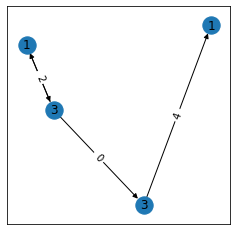

where: [0, 1, 4, 6, 7, 10, 11, 12, 15, 23, 24, 27, 28, 30, 31, 36, 38, 39, 40, 46, 47, 51, 52, 54, 56, 59, 61, 62, 63, 65, 66, 68, 70, 73, 75, 77, 78, 80, 84, 85, 86, 88, 91, 92, 94, 95, 97, 99, 106, 111, 112, 113, 115, 122, 123, 127, 129, 131, 134, 135, 137, 138, 139, 144, 146, 147, 150, 151, 152, 154, 155, 157, 161, 162, 167, 176, 177, 180, 182, 186, 190, 191, 193, 195, 196, 198, 200, 202, 204, 206, 209, 216, 217, 218, 221, 223, 226, 227, 229, 230, 232]

-----------------

t # 11
v 0 1
v 1 3
v 2 3
v 3 1
v 4 3
e 0 1 4
e 1 0 2
e 1 2 0
e 2 3 4
e 3 4 4

Support: 100


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


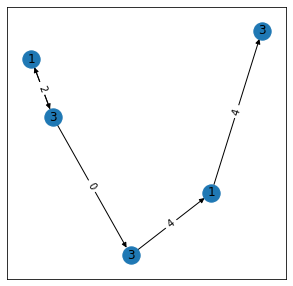

where: [0, 1, 4, 6, 7, 10, 11, 12, 15, 23, 24, 27, 28, 30, 31, 36, 38, 39, 40, 46, 51, 52, 54, 56, 59, 61, 62, 63, 65, 66, 68, 70, 73, 75, 77, 78, 80, 84, 85, 86, 88, 91, 92, 94, 95, 97, 99, 106, 111, 112, 113, 115, 122, 123, 127, 129, 131, 134, 135, 137, 138, 139, 144, 146, 147, 150, 151, 152, 154, 155, 157, 161, 162, 167, 176, 177, 180, 182, 186, 190, 191, 193, 195, 196, 198, 200, 202, 204, 206, 209, 216, 217, 218, 221, 223, 226, 227, 229, 230, 232]

-----------------

t # 12
v 0 1
v 1 3
v 2 3
v 3 3
e 0 1 4
e 1 0 2
e 1 2 0
e 1 3 5

Support: 102


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


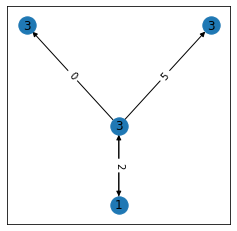

where: [0, 1, 4, 7, 9, 10, 11, 12, 15, 24, 27, 28, 30, 31, 37, 38, 39, 45, 46, 51, 52, 54, 56, 61, 62, 63, 64, 65, 66, 67, 68, 70, 73, 75, 77, 78, 80, 84, 85, 86, 87, 88, 91, 92, 94, 95, 97, 99, 106, 108, 111, 112, 113, 115, 122, 123, 125, 127, 129, 131, 134, 135, 137, 138, 139, 146, 147, 150, 151, 152, 154, 155, 157, 161, 162, 167, 176, 177, 180, 182, 186, 187, 188, 190, 191, 193, 195, 196, 198, 200, 202, 206, 209, 216, 217, 218, 221, 223, 226, 227, 230, 232]

-----------------

t # 13
v 0 1
v 1 3
v 2 3
v 3 1
e 0 1 4
e 1 0 2
e 1 2 0
e 1 3 4

Support: 100


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


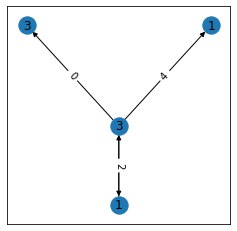

where: [0, 1, 4, 7, 10, 11, 12, 15, 23, 24, 27, 28, 30, 31, 36, 37, 38, 39, 40, 46, 51, 52, 54, 59, 62, 63, 64, 65, 66, 67, 68, 70, 73, 75, 77, 78, 80, 84, 85, 86, 87, 88, 91, 92, 93, 94, 95, 97, 108, 111, 112, 113, 115, 122, 123, 125, 127, 131, 134, 135, 137, 138, 139, 144, 146, 147, 150, 151, 152, 154, 155, 157, 161, 162, 167, 176, 177, 180, 182, 186, 187, 188, 191, 193, 195, 196, 200, 202, 204, 206, 209, 216, 217, 218, 223, 226, 227, 229, 230, 232]

-----------------

t # 14
v 0 1
v 1 3
v 2 1
v 3 3
e 0 1 4
e 1 0 2
e 1 2 4
e 2 3 0

Support: 100


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


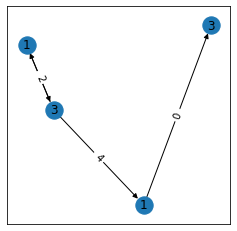

where: [0, 1, 7, 10, 11, 12, 15, 23, 24, 27, 28, 30, 31, 33, 36, 37, 38, 39, 40, 46, 51, 52, 54, 59, 62, 63, 64, 65, 66, 67, 68, 70, 73, 75, 76, 77, 78, 79, 80, 84, 85, 86, 87, 91, 93, 95, 96, 97, 108, 111, 113, 115, 122, 123, 125, 127, 134, 135, 136, 137, 138, 139, 141, 144, 146, 147, 150, 151, 154, 155, 157, 161, 162, 167, 176, 177, 179, 180, 182, 186, 187, 191, 193, 195, 196, 200, 202, 204, 206, 209, 216, 217, 218, 222, 223, 226, 227, 229, 230, 232]

-----------------

t # 15
v 0 1
v 1 3
v 2 1
v 3 3
e 0 1 4
e 1 0 2
e 1 2 4
e 1 3 5

Support: 101


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


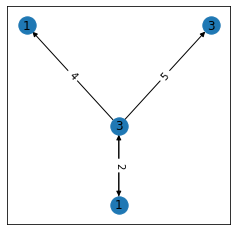

where: [0, 1, 4, 7, 10, 11, 12, 15, 24, 27, 28, 30, 31, 33, 37, 38, 39, 44, 46, 51, 52, 54, 62, 63, 64, 65, 66, 67, 68, 70, 73, 75, 76, 77, 78, 79, 80, 84, 85, 86, 87, 88, 91, 92, 94, 95, 96, 97, 108, 111, 112, 113, 115, 122, 123, 125, 127, 131, 134, 135, 136, 137, 138, 139, 141, 146, 147, 150, 151, 152, 154, 155, 157, 161, 162, 167, 176, 177, 179, 180, 182, 186, 187, 188, 191, 193, 195, 196, 200, 202, 206, 209, 216, 217, 218, 222, 223, 226, 227, 230, 232]

-----------------

t # 16
v 0 1
v 1 3
v 2 2
v 3 2
e 0 1 4
e 1 0 3
e 1 2 4
e 2 3 1

Support: 102


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


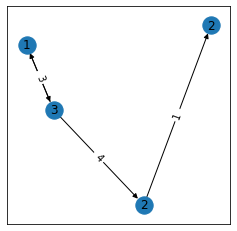

where: [2, 3, 11, 15, 16, 18, 21, 22, 26, 30, 31, 35, 38, 39, 41, 47, 49, 50, 53, 55, 58, 59, 63, 64, 67, 72, 73, 75, 76, 77, 78, 79, 80, 82, 84, 86, 87, 89, 91, 92, 93, 94, 97, 101, 103, 106, 107, 110, 112, 113, 115, 119, 120, 123, 124, 125, 129, 132, 134, 138, 140, 144, 146, 147, 148, 152, 154, 160, 163, 170, 174, 175, 176, 181, 182, 183, 184, 185, 186, 187, 188, 189, 192, 193, 195, 197, 200, 202, 204, 210, 217, 219, 220, 221, 225, 226, 227, 228, 230, 231, 232, 233]

-----------------

t # 17
v 0 1
v 1 3
v 2 2
v 3 3
e 0 1 4
e 1 0 3
e 1 2 4
e 2 3 2

Support: 131


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


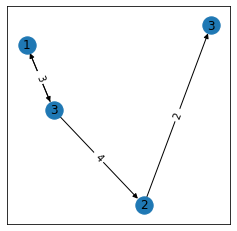

where: [2, 3, 11, 12, 14, 18, 19, 21, 22, 26, 27, 30, 31, 33, 35, 36, 37, 38, 39, 40, 41, 47, 48, 49, 50, 53, 55, 57, 58, 59, 63, 64, 67, 69, 70, 72, 73, 75, 76, 77, 78, 79, 80, 82, 84, 86, 87, 91, 92, 93, 94, 97, 99, 101, 103, 104, 106, 107, 109, 110, 112, 113, 115, 118, 119, 120, 123, 124, 125, 129, 130, 131, 132, 134, 135, 136, 138, 140, 141, 144, 146, 147, 148, 151, 152, 154, 157, 158, 159, 160, 161, 162, 163, 170, 173, 174, 175, 181, 182, 183, 184, 185, 186, 187, 188, 189, 192, 193, 195, 197, 199, 200, 201, 202, 204, 206, 210, 212, 217, 219, 220, 221, 222, 225, 226, 227, 228, 230, 231, 232, 233]

-----------------

t # 18
v 0 1
v 1 3
v 2 2
v 3 3
v 4 1
e 0 1 4
e 1 0 3
e 1 2 4
e 2 3 2
e 3 4 1

Support: 121


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


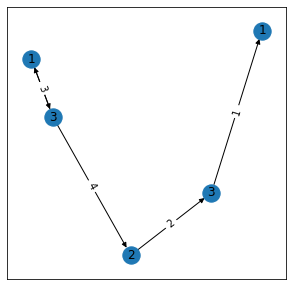

where: [2, 3, 11, 12, 14, 18, 19, 22, 26, 27, 30, 31, 33, 35, 36, 37, 38, 39, 40, 41, 47, 49, 50, 53, 55, 57, 58, 59, 63, 64, 67, 69, 70, 72, 73, 75, 76, 78, 79, 80, 82, 84, 86, 87, 91, 92, 93, 94, 97, 99, 101, 103, 104, 106, 109, 112, 115, 118, 119, 120, 123, 124, 125, 129, 130, 131, 132, 134, 135, 136, 138, 140, 141, 144, 146, 147, 151, 152, 157, 158, 159, 160, 161, 162, 163, 173, 174, 175, 181, 182, 183, 184, 186, 187, 188, 189, 192, 193, 195, 197, 199, 200, 201, 202, 204, 206, 210, 212, 217, 219, 220, 221, 222, 225, 226, 227, 228, 230, 231, 232, 233]

-----------------

t # 19
v 0 1
v 1 3
v 2 2
v 3 3
v 4 1
v 5 3
e 0 1 4
e 1 0 3
e 1 2 4
e 2 3 2
e 3 4 1
e 4 5 5

Support: 112


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


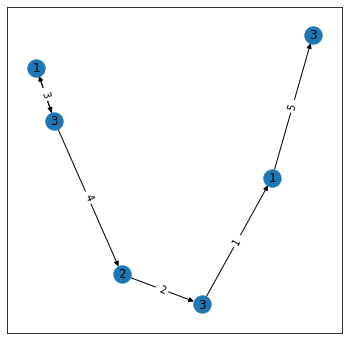

where: [2, 3, 11, 12, 14, 18, 19, 22, 26, 27, 30, 31, 33, 35, 36, 37, 38, 39, 40, 41, 47, 49, 50, 53, 55, 58, 59, 63, 64, 67, 69, 70, 72, 73, 75, 76, 78, 79, 80, 84, 86, 87, 91, 92, 93, 94, 99, 103, 104, 106, 109, 112, 115, 118, 119, 120, 123, 124, 125, 129, 130, 131, 132, 134, 135, 136, 138, 140, 141, 144, 146, 147, 151, 152, 157, 158, 159, 162, 163, 173, 174, 175, 182, 183, 184, 186, 187, 188, 189, 192, 193, 195, 197, 199, 200, 202, 204, 206, 210, 212, 217, 219, 220, 221, 222, 225, 226, 227, 228, 230, 231, 233]

-----------------

t # 20
v 0 1
v 1 3
v 2 2
v 3 3
v 4 1
v 5 3
v 6 3
e 0 1 4
e 1 0 3
e 1 2 4
e 2 3 2
e 3 4 1
e 4 5 5
e 5 6 4

Support: 101


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


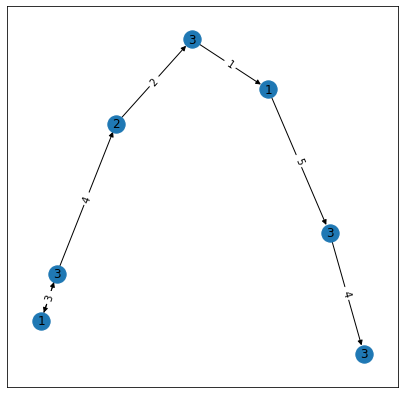

where: [2, 3, 11, 12, 14, 18, 19, 22, 26, 27, 30, 31, 35, 36, 37, 38, 39, 40, 41, 49, 50, 53, 55, 59, 63, 64, 67, 69, 70, 73, 75, 76, 78, 79, 80, 84, 86, 87, 91, 92, 93, 94, 99, 103, 106, 109, 112, 115, 118, 119, 120, 123, 124, 125, 129, 130, 131, 132, 134, 135, 136, 138, 140, 141, 144, 146, 147, 157, 158, 159, 162, 163, 173, 174, 175, 182, 183, 184, 186, 187, 188, 189, 192, 193, 195, 197, 199, 200, 202, 204, 206, 210, 217, 221, 222, 225, 226, 227, 228, 230, 231]

-----------------

t # 21
v 0 1
v 1 3
v 2 2
v 3 3
v 4 1
v 5 1
e 0 1 4
e 1 0 3
e 1 2 4
e 2 3 2
e 3 4 1
e 4 5 3

Support: 116


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


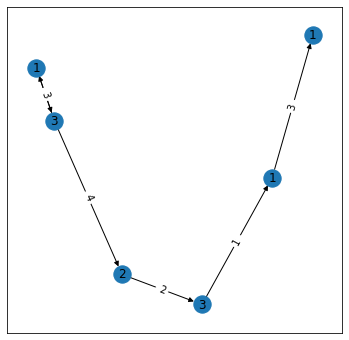

where: [3, 11, 12, 14, 18, 19, 22, 26, 27, 30, 31, 33, 35, 36, 37, 38, 39, 40, 41, 47, 49, 50, 53, 55, 57, 58, 59, 63, 64, 69, 70, 72, 73, 75, 76, 78, 79, 80, 82, 84, 86, 87, 91, 92, 93, 94, 99, 101, 103, 104, 106, 109, 112, 115, 118, 119, 120, 123, 124, 125, 129, 130, 131, 132, 134, 135, 136, 138, 140, 141, 144, 146, 147, 151, 152, 157, 158, 159, 160, 161, 162, 163, 173, 174, 175, 181, 182, 183, 184, 186, 187, 188, 189, 192, 193, 195, 197, 199, 200, 202, 204, 206, 210, 212, 217, 219, 220, 221, 222, 225, 226, 227, 228, 230, 231, 233]

-----------------

t # 22
v 0 1
v 1 3
v 2 2
v 3 3
v 4 1
v 5 1
v 6 3
e 0 1 4
e 1 0 3
e 1 2 4
e 2 3 2
e 3 4 1
e 3 6 3
e 4 5 3

Support: 103


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


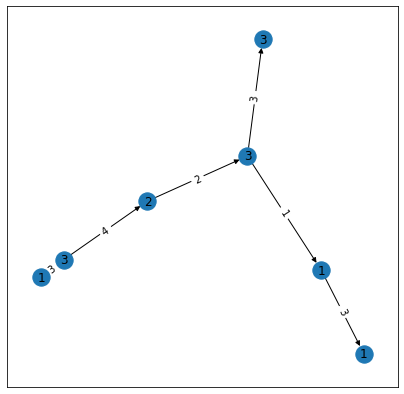

where: [3, 11, 12, 14, 18, 19, 22, 26, 27, 30, 31, 35, 36, 37, 38, 39, 40, 41, 49, 53, 55, 58, 59, 63, 64, 69, 70, 73, 75, 76, 78, 79, 80, 84, 86, 87, 91, 92, 93, 94, 99, 101, 103, 104, 106, 109, 112, 115, 119, 120, 123, 125, 129, 130, 131, 132, 134, 135, 136, 138, 140, 141, 146, 147, 151, 152, 157, 158, 159, 160, 161, 162, 163, 173, 174, 175, 181, 182, 184, 186, 188, 189, 192, 193, 195, 197, 199, 200, 202, 204, 206, 210, 212, 217, 219, 221, 222, 225, 227, 228, 230, 231, 233]

-----------------

t # 23
v 0 1
v 1 3
v 2 2
v 3 3
v 4 1
v 5 3
e 0 1 4
e 1 0 3
e 1 2 4
e 2 3 2
e 3 4 1
e 3 5 3

Support: 107


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


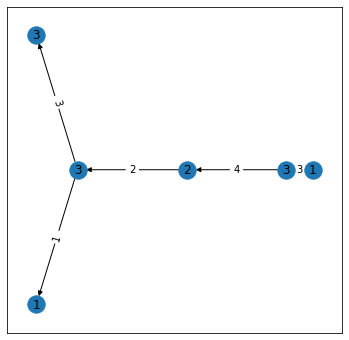

where: [3, 11, 12, 14, 18, 19, 22, 26, 27, 30, 31, 35, 36, 37, 38, 39, 40, 41, 49, 53, 55, 58, 59, 63, 64, 69, 70, 73, 75, 76, 78, 79, 80, 84, 86, 87, 91, 92, 93, 94, 97, 99, 101, 103, 104, 106, 109, 112, 115, 119, 120, 123, 125, 129, 130, 131, 132, 134, 135, 136, 138, 140, 141, 144, 146, 147, 151, 152, 157, 158, 159, 160, 161, 162, 163, 173, 174, 175, 181, 182, 184, 186, 187, 188, 189, 192, 193, 195, 197, 199, 200, 201, 202, 204, 206, 210, 212, 217, 219, 221, 222, 225, 227, 228, 230, 231, 233]

-----------------

t # 24
v 0 1
v 1 3
v 2 2
v 3 3
v 4 3
e 0 1 4
e 1 0 3
e 1 2 4
e 2 3 2
e 3 4 0

Support: 106


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


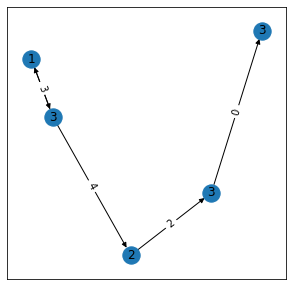

where: [2, 3, 11, 12, 18, 19, 21, 22, 26, 30, 31, 33, 35, 36, 37, 38, 39, 41, 47, 48, 49, 50, 53, 55, 59, 64, 69, 70, 73, 75, 78, 80, 82, 84, 86, 87, 91, 92, 93, 97, 99, 101, 103, 106, 109, 110, 112, 113, 119, 120, 123, 124, 125, 129, 130, 131, 132, 135, 136, 138, 140, 141, 144, 146, 147, 148, 151, 152, 154, 157, 159, 160, 161, 162, 163, 170, 174, 175, 182, 183, 184, 186, 187, 188, 189, 192, 193, 195, 197, 200, 201, 202, 204, 206, 210, 212, 217, 220, 225, 226, 227, 228, 230, 231, 232, 233]

-----------------

t # 25
v 0 1
v 1 3
v 2 2
v 3 3
v 4 3
e 0 1 4
e 1 0 3
e 1 2 4
e 1 4 4
e 2 3 2

Support: 105


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


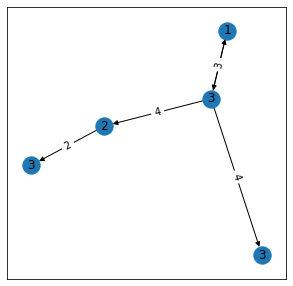

where: [2, 3, 11, 12, 14, 19, 21, 22, 26, 27, 30, 31, 35, 36, 37, 39, 40, 41, 48, 50, 53, 55, 58, 59, 63, 64, 67, 69, 73, 75, 76, 77, 78, 79, 80, 82, 84, 91, 92, 93, 94, 97, 99, 103, 104, 107, 109, 110, 112, 113, 115, 119, 125, 129, 130, 131, 132, 134, 135, 136, 138, 140, 141, 146, 147, 148, 151, 154, 157, 158, 159, 160, 161, 162, 163, 170, 173, 174, 182, 183, 184, 185, 186, 187, 189, 192, 193, 197, 199, 201, 204, 206, 210, 212, 217, 219, 221, 222, 226, 227, 228, 230, 231, 232, 233]

-----------------

t # 26
v 0 1
v 1 3
v 2 2
v 3 3
v 4 3
e 0 1 4
e 1 0 3
e 1 2 4
e 1 4 5
e 2 3 2

Support: 105


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


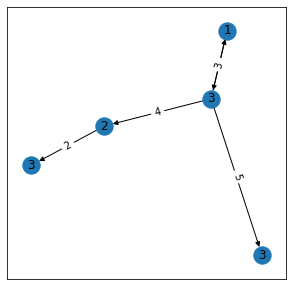

where: [2, 3, 11, 14, 18, 21, 22, 26, 30, 31, 33, 35, 39, 49, 50, 53, 57, 58, 59, 63, 64, 67, 69, 70, 72, 73, 75, 76, 77, 79, 80, 82, 84, 86, 87, 91, 92, 93, 94, 97, 99, 103, 104, 106, 107, 109, 110, 112, 115, 118, 119, 120, 124, 125, 129, 130, 132, 134, 135, 136, 141, 144, 146, 151, 152, 154, 158, 159, 160, 161, 162, 163, 170, 173, 174, 175, 181, 182, 183, 184, 185, 186, 187, 188, 193, 195, 197, 200, 204, 206, 210, 212, 217, 219, 220, 221, 222, 225, 226, 227, 228, 230, 231, 232, 233]

-----------------

t # 27
v 0 1
v 1 3
v 2 2
v 3 3
v 4 3
e 0 1 4
e 1 0 3
e 1 2 4
e 2 3 2
e 3 4 3

Support: 116


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


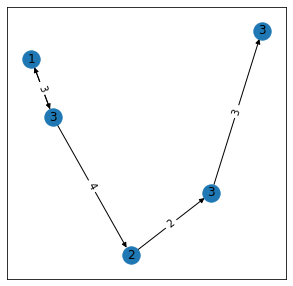

where: [3, 11, 12, 14, 18, 19, 21, 22, 26, 27, 30, 31, 35, 36, 37, 38, 39, 40, 41, 49, 53, 55, 58, 59, 63, 64, 69, 70, 73, 75, 76, 77, 78, 79, 80, 82, 84, 86, 87, 91, 92, 93, 94, 97, 99, 101, 103, 104, 106, 107, 109, 110, 112, 115, 119, 120, 123, 125, 129, 130, 131, 132, 134, 135, 136, 138, 140, 141, 144, 146, 147, 148, 151, 152, 157, 158, 159, 160, 161, 162, 163, 173, 174, 175, 181, 182, 184, 185, 186, 187, 188, 189, 192, 193, 195, 197, 199, 200, 201, 202, 204, 206, 210, 212, 217, 219, 221, 222, 225, 226, 227, 228, 230, 231, 232, 233]

-----------------

t # 28
v 0 1
v 1 3
v 2 2
v 3 3
e 0 1 4
e 1 0 3
e 1 2 4
e 1 3 4

Support: 111


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


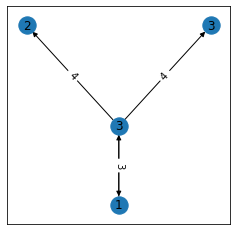

where: [2, 3, 11, 12, 14, 15, 16, 19, 21, 22, 26, 27, 30, 31, 35, 36, 37, 39, 40, 41, 45, 48, 50, 53, 55, 58, 59, 63, 64, 67, 69, 73, 75, 76, 77, 78, 79, 80, 81, 82, 84, 89, 91, 92, 93, 94, 97, 99, 103, 104, 107, 109, 110, 112, 113, 115, 119, 125, 129, 130, 131, 132, 134, 135, 136, 138, 140, 141, 146, 147, 148, 151, 154, 157, 158, 159, 160, 161, 162, 163, 170, 173, 174, 176, 182, 183, 184, 185, 186, 187, 189, 192, 193, 197, 199, 201, 204, 206, 210, 212, 217, 219, 221, 222, 226, 227, 228, 230, 231, 232, 233]

-----------------

t # 29
v 0 1
v 1 3
v 2 2
v 3 3
v 4 1
e 0 1 4
e 1 0 3
e 1 2 4
e 1 3 4
e 3 4 1

Support: 101


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


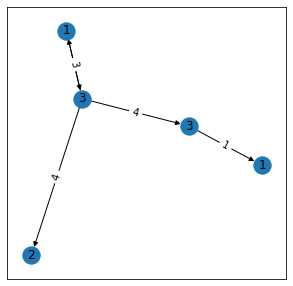

where: [2, 3, 11, 12, 14, 15, 16, 19, 21, 22, 26, 27, 30, 31, 35, 36, 39, 40, 41, 48, 50, 53, 58, 59, 63, 64, 69, 73, 75, 76, 77, 78, 80, 81, 82, 84, 91, 92, 94, 97, 99, 103, 104, 107, 109, 110, 112, 113, 115, 119, 129, 130, 131, 132, 134, 135, 136, 138, 140, 141, 146, 147, 148, 151, 154, 157, 158, 159, 160, 161, 162, 163, 170, 174, 176, 182, 183, 184, 185, 186, 187, 189, 192, 193, 197, 199, 201, 204, 206, 210, 212, 217, 219, 221, 222, 226, 227, 230, 231, 232, 233]

-----------------

t # 30
v 0 1
v 1 3
v 2 2
v 3 3
v 4 1
v 5 2
e 0 1 4
e 1 0 3
e 1 2 4
e 1 3 4
e 3 4 1
e 4 5 5

Support: 101


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


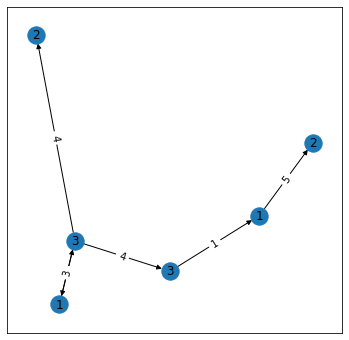

where: [2, 3, 11, 12, 14, 15, 16, 19, 21, 22, 26, 27, 30, 31, 35, 36, 39, 40, 41, 48, 50, 53, 58, 59, 63, 64, 69, 73, 75, 76, 77, 78, 80, 81, 82, 84, 91, 92, 94, 97, 99, 103, 104, 107, 109, 110, 112, 113, 115, 119, 129, 130, 131, 132, 134, 135, 136, 138, 140, 141, 146, 147, 148, 151, 154, 157, 158, 159, 160, 161, 162, 163, 170, 174, 176, 182, 183, 184, 185, 186, 187, 189, 192, 193, 197, 199, 201, 204, 206, 210, 212, 217, 219, 221, 222, 226, 227, 230, 231, 232, 233]

-----------------



/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


t # 31
v 0 1
v 1 3
v 2 2
v 3 3
e 0 1 4
e 1 0 3
e 1 2 4
e 1 3 5

Support: 110


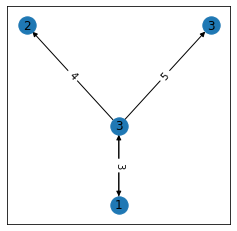

where: [2, 3, 11, 14, 16, 18, 21, 22, 26, 30, 31, 33, 35, 39, 45, 49, 50, 53, 57, 58, 59, 63, 64, 67, 69, 70, 72, 73, 75, 76, 77, 79, 80, 81, 82, 84, 86, 87, 89, 91, 92, 93, 94, 97, 99, 103, 104, 106, 107, 109, 110, 112, 115, 118, 119, 120, 124, 125, 129, 130, 132, 134, 135, 136, 141, 144, 146, 151, 152, 154, 158, 159, 160, 161, 162, 163, 170, 173, 174, 175, 176, 181, 182, 183, 184, 185, 186, 187, 188, 193, 195, 197, 200, 204, 206, 210, 212, 217, 219, 220, 221, 222, 225, 226, 227, 228, 230, 231, 232, 233]

-----------------

t # 32
v 0 1
v 1 3
v 2 2
v 3 3
v 4 2
e 0 1 4
e 1 0 3
e 1 2 4
e 1 3 5
e 3 4 2

Support: 104


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


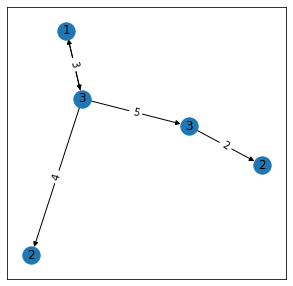

where: [2, 3, 11, 14, 16, 18, 21, 22, 26, 30, 31, 33, 35, 39, 45, 49, 50, 53, 57, 59, 63, 64, 67, 69, 72, 73, 75, 76, 77, 79, 80, 81, 82, 84, 86, 87, 89, 91, 92, 93, 94, 97, 99, 103, 104, 106, 107, 109, 110, 112, 115, 118, 120, 124, 125, 129, 130, 132, 134, 135, 136, 141, 146, 151, 154, 158, 159, 160, 161, 162, 163, 170, 173, 174, 175, 176, 181, 183, 184, 185, 186, 187, 188, 193, 195, 197, 200, 204, 206, 210, 212, 217, 219, 220, 221, 222, 225, 226, 227, 228, 230, 231, 232, 233]

-----------------

t # 33
v 0 1
v 1 3
v 2 2
v 3 3
v 4 1
e 0 1 4
e 1 0 3
e 1 2 4
e 1 3 5
e 3 4 4

Support: 100


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


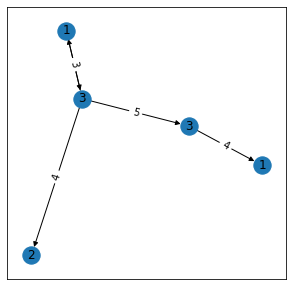

where: [2, 3, 11, 16, 18, 21, 22, 26, 30, 33, 35, 39, 45, 49, 50, 53, 57, 58, 59, 63, 64, 67, 69, 70, 72, 73, 75, 76, 77, 79, 80, 81, 82, 84, 86, 87, 89, 91, 92, 93, 94, 99, 103, 104, 106, 107, 110, 112, 115, 118, 119, 120, 124, 125, 129, 130, 132, 135, 136, 141, 146, 151, 154, 158, 159, 160, 161, 162, 163, 170, 173, 174, 175, 176, 181, 182, 184, 185, 186, 187, 188, 193, 195, 197, 200, 204, 206, 210, 212, 217, 219, 220, 221, 222, 225, 226, 228, 230, 231, 233]

-----------------

t # 34
v 0 1
v 1 3
v 2 2
v 3 3
v 4 1
e 0 1 4
e 1 0 3
e 1 2 4
e 1 3 5
e 3 4 2

Support: 100


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


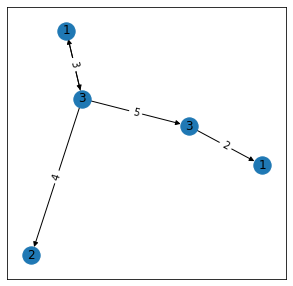

where: [2, 3, 11, 14, 16, 18, 21, 22, 26, 30, 33, 35, 39, 45, 49, 53, 57, 58, 59, 63, 64, 67, 69, 70, 72, 73, 75, 76, 77, 79, 80, 84, 86, 87, 89, 91, 92, 93, 94, 97, 99, 103, 104, 106, 110, 112, 115, 119, 124, 125, 129, 130, 132, 134, 135, 136, 141, 144, 146, 151, 152, 154, 158, 159, 160, 161, 162, 163, 170, 173, 174, 176, 181, 182, 183, 184, 185, 186, 187, 188, 193, 195, 197, 200, 204, 206, 210, 212, 217, 219, 220, 221, 222, 225, 226, 228, 230, 231, 232, 233]

-----------------

t # 35
v 0 1
v 1 3
v 2 3
v 3 1
e 0 1 4
e 1 0 3
e 1 2 4
e 2 3 1

Support: 105


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


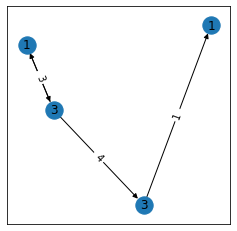

where: [2, 3, 4, 11, 12, 14, 15, 16, 19, 21, 22, 26, 27, 30, 31, 35, 36, 39, 40, 41, 46, 48, 50, 53, 58, 59, 63, 64, 65, 68, 69, 73, 75, 76, 77, 78, 80, 81, 82, 84, 91, 92, 94, 97, 99, 103, 104, 107, 109, 110, 112, 113, 115, 119, 129, 130, 131, 132, 134, 135, 136, 138, 140, 141, 146, 147, 148, 151, 154, 157, 158, 159, 160, 161, 162, 163, 170, 174, 176, 182, 183, 184, 185, 186, 187, 189, 192, 193, 197, 199, 201, 204, 206, 210, 212, 217, 219, 221, 222, 226, 227, 230, 231, 232, 233]

-----------------

t # 36
v 0 1
v 1 3
v 2 3
v 3 1
v 4 1
e 0 1 4
e 1 0 3
e 1 2 4
e 2 3 1
e 3 4 4

Support: 100


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


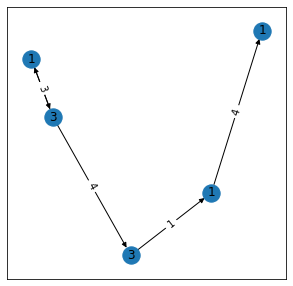

where: [2, 3, 4, 11, 12, 14, 15, 16, 19, 21, 22, 26, 27, 30, 35, 36, 39, 40, 41, 46, 48, 50, 53, 58, 59, 63, 64, 65, 68, 69, 73, 75, 76, 77, 78, 80, 81, 82, 84, 91, 92, 97, 99, 103, 104, 107, 109, 110, 112, 115, 119, 129, 130, 131, 132, 134, 135, 136, 138, 140, 141, 146, 147, 148, 151, 154, 157, 159, 160, 161, 162, 163, 170, 174, 176, 182, 183, 184, 185, 186, 187, 189, 193, 197, 199, 201, 204, 206, 210, 212, 217, 219, 221, 222, 226, 227, 230, 231, 232, 233]

-----------------

t # 37
v 0 1
v 1 3
v 2 3
v 3 1
v 4 2
e 0 1 4
e 1 0 3
e 1 2 4
e 2 3 1
e 3 4 5

Support: 105


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


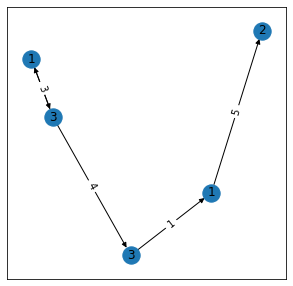

where: [2, 3, 4, 11, 12, 14, 15, 16, 19, 21, 22, 26, 27, 30, 31, 35, 36, 39, 40, 41, 46, 48, 50, 53, 58, 59, 63, 64, 65, 68, 69, 73, 75, 76, 77, 78, 80, 81, 82, 84, 91, 92, 94, 97, 99, 103, 104, 107, 109, 110, 112, 113, 115, 119, 129, 130, 131, 132, 134, 135, 136, 138, 140, 141, 146, 147, 148, 151, 154, 157, 158, 159, 160, 161, 162, 163, 170, 174, 176, 182, 183, 184, 185, 186, 187, 189, 192, 193, 197, 199, 201, 204, 206, 210, 212, 217, 219, 221, 222, 226, 227, 230, 231, 232, 233]

-----------------

t # 38
v 0 1
v 1 3
v 2 3
v 3 2
e 0 1 4
e 1 0 3
e 1 2 5
e 2 3 2

Support: 110


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


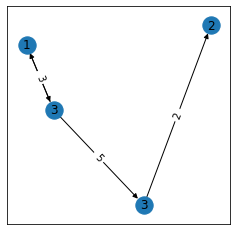

where: [2, 3, 4, 11, 14, 16, 18, 21, 22, 26, 30, 31, 33, 35, 39, 45, 46, 49, 50, 53, 57, 59, 63, 64, 67, 68, 69, 72, 73, 75, 76, 77, 79, 80, 81, 82, 84, 86, 87, 88, 89, 91, 92, 93, 94, 97, 99, 103, 104, 106, 107, 109, 110, 112, 115, 118, 120, 124, 125, 129, 130, 132, 134, 135, 136, 141, 143, 146, 151, 154, 158, 159, 160, 161, 162, 163, 167, 170, 173, 174, 175, 176, 181, 183, 184, 185, 186, 187, 188, 193, 195, 197, 200, 204, 206, 210, 212, 217, 219, 220, 221, 222, 225, 226, 227, 228, 230, 231, 232, 233]

-----------------

t # 39
v 0 1
v 1 3
v 2 3
v 3 2
v 4 1
e 0 1 4
e 1 0 3
e 1 2 5
e 2 3 2
e 3 4 4

Support: 102


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


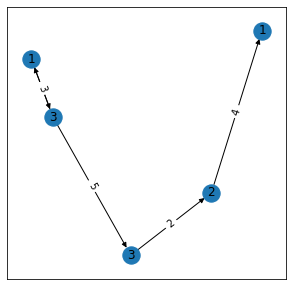

where: [2, 4, 11, 14, 16, 18, 21, 22, 26, 30, 31, 33, 35, 39, 46, 49, 50, 53, 57, 59, 63, 64, 67, 68, 69, 72, 73, 75, 76, 77, 79, 80, 81, 82, 84, 86, 87, 88, 91, 92, 93, 97, 99, 103, 104, 106, 107, 109, 110, 112, 115, 118, 124, 125, 129, 132, 134, 135, 136, 141, 143, 146, 151, 154, 159, 160, 161, 162, 163, 167, 170, 173, 174, 175, 176, 181, 183, 184, 185, 186, 187, 188, 193, 195, 197, 200, 204, 206, 210, 212, 217, 220, 221, 222, 225, 226, 227, 228, 230, 231, 232, 233]

-----------------

t # 40
v 0 1
v 1 3
v 2 3
v 3 2
v 4 1
e 0 1 4
e 1 0 3
e 1 2 5
e 2 3 2
e 2 4 4

Support: 101


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


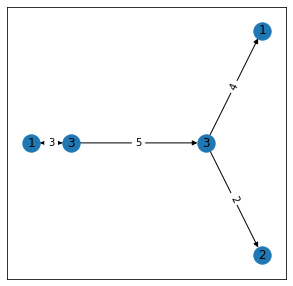

where: [2, 3, 4, 11, 16, 18, 21, 22, 26, 30, 33, 35, 39, 45, 46, 49, 50, 53, 57, 59, 63, 64, 67, 68, 69, 72, 73, 75, 76, 77, 79, 80, 81, 82, 84, 86, 87, 88, 89, 91, 92, 93, 94, 99, 103, 104, 106, 107, 110, 112, 115, 118, 120, 124, 125, 129, 130, 132, 135, 136, 141, 143, 146, 151, 154, 158, 159, 160, 161, 162, 163, 170, 173, 174, 175, 176, 181, 184, 185, 186, 187, 188, 193, 195, 197, 200, 204, 206, 210, 212, 217, 219, 220, 221, 222, 225, 226, 228, 230, 231, 233]

-----------------

t # 41
v 0 1
v 1 3
v 2 3
v 3 2
v 4 2
e 0 1 4
e 1 0 3
e 1 2 5
e 2 3 2
e 3 4 5

Support: 100


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


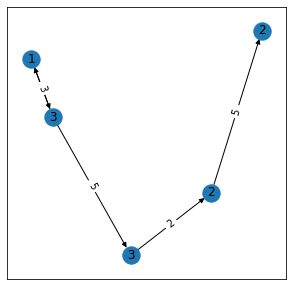

where: [2, 3, 4, 11, 14, 16, 18, 21, 26, 30, 31, 33, 35, 39, 46, 49, 50, 53, 57, 59, 63, 64, 67, 68, 69, 72, 73, 75, 76, 77, 79, 81, 82, 84, 86, 87, 88, 89, 91, 92, 94, 97, 103, 104, 106, 107, 110, 112, 115, 120, 124, 125, 129, 130, 132, 134, 135, 136, 141, 143, 151, 154, 158, 159, 160, 161, 162, 163, 167, 170, 173, 174, 175, 176, 181, 183, 184, 185, 186, 187, 188, 193, 195, 200, 204, 206, 210, 212, 217, 220, 221, 222, 225, 226, 227, 228, 230, 231, 232, 233]

-----------------

t # 42
v 0 1
v 1 3
v 2 3
v 3 1
e 0 1 4
e 1 0 3
e 1 2 5
e 2 3 4

Support: 106


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


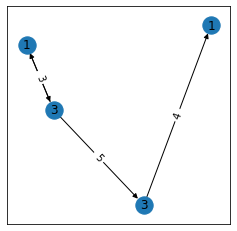

where: [2, 3, 4, 11, 16, 18, 21, 22, 26, 30, 33, 35, 39, 45, 46, 49, 50, 53, 57, 58, 59, 63, 64, 67, 68, 69, 70, 72, 73, 75, 76, 77, 79, 80, 81, 82, 84, 86, 87, 88, 89, 91, 92, 93, 94, 99, 103, 104, 106, 107, 110, 112, 115, 118, 119, 120, 124, 125, 129, 130, 132, 135, 136, 141, 143, 146, 151, 154, 158, 159, 160, 161, 162, 163, 170, 173, 174, 175, 176, 181, 182, 184, 185, 186, 187, 188, 193, 195, 197, 200, 204, 206, 210, 212, 217, 219, 220, 221, 222, 225, 226, 228, 229, 230, 231, 233]

-----------------

t # 43
v 0 1
v 1 3
v 2 3
v 3 1
e 0 1 4
e 1 0 3
e 1 2 5
e 2 3 2

Support: 106


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


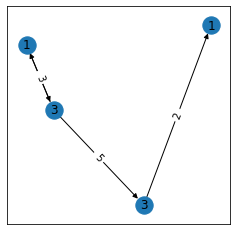

where: [2, 3, 4, 11, 14, 16, 18, 21, 22, 26, 30, 33, 35, 39, 45, 46, 49, 53, 57, 58, 59, 63, 64, 67, 68, 69, 70, 72, 73, 75, 76, 77, 79, 80, 84, 86, 87, 89, 91, 92, 93, 94, 97, 99, 103, 104, 106, 110, 112, 115, 119, 124, 125, 129, 130, 132, 134, 135, 136, 141, 143, 144, 146, 151, 152, 154, 158, 159, 160, 161, 162, 163, 167, 170, 173, 174, 176, 181, 182, 183, 184, 185, 186, 187, 188, 193, 195, 197, 200, 204, 206, 210, 212, 217, 219, 220, 221, 222, 225, 226, 228, 229, 230, 231, 232, 233]

-----------------

t # 44
v 0 1
v 1 3
v 2 2
v 3 1
e 0 1 4
e 0 2 5
e 1 0 3
e 2 3 4

Support: 100


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


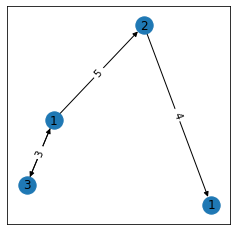

where: [2, 3, 4, 12, 16, 18, 19, 22, 27, 30, 31, 35, 36, 37, 38, 39, 41, 48, 49, 50, 53, 55, 57, 58, 63, 64, 65, 67, 68, 69, 70, 73, 75, 78, 79, 80, 81, 82, 84, 86, 92, 101, 103, 104, 106, 107, 110, 112, 115, 118, 119, 120, 124, 129, 130, 131, 134, 136, 138, 140, 141, 143, 144, 146, 147, 148, 152, 154, 157, 161, 162, 163, 164, 173, 174, 176, 182, 184, 186, 188, 192, 193, 195, 199, 200, 201, 202, 204, 210, 212, 217, 219, 221, 226, 227, 228, 230, 231, 232, 233]

-----------------

t # 45
v 0 1
v 1 3
v 2 2
v 3 1
e 0 1 4
e 0 2 5
e 1 0 3
e 2 3 1

Support: 100


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


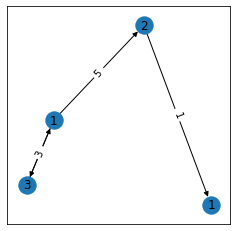

where: [2, 3, 4, 12, 16, 18, 19, 22, 27, 30, 31, 35, 36, 37, 39, 41, 48, 49, 50, 53, 55, 57, 58, 63, 64, 65, 67, 68, 69, 70, 73, 75, 78, 79, 80, 81, 82, 84, 86, 92, 101, 103, 104, 106, 107, 110, 112, 115, 118, 119, 120, 124, 129, 130, 131, 134, 136, 138, 140, 141, 143, 144, 146, 147, 148, 151, 152, 154, 157, 161, 162, 163, 164, 173, 174, 175, 176, 182, 184, 186, 188, 192, 193, 195, 199, 201, 202, 204, 210, 212, 217, 219, 221, 226, 227, 228, 230, 231, 232, 233]

-----------------

t # 46
v 0 1
v 1 3
v 2 2
v 3 1
e 0 1 4
e 1 0 3
e 1 2 3
e 2 3 4

Support: 102


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


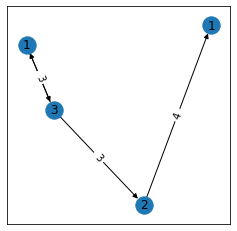

where: [3, 11, 12, 14, 16, 18, 19, 21, 22, 26, 27, 30, 31, 35, 36, 37, 40, 41, 45, 46, 48, 53, 59, 63, 64, 65, 67, 68, 69, 70, 73, 75, 76, 77, 78, 80, 82, 84, 88, 91, 92, 94, 101, 104, 107, 109, 110, 112, 113, 115, 119, 123, 124, 125, 126, 130, 131, 132, 136, 138, 140, 146, 147, 148, 154, 157, 158, 160, 161, 162, 163, 164, 167, 170, 173, 174, 175, 176, 182, 184, 186, 187, 188, 192, 193, 197, 200, 204, 206, 210, 219, 220, 221, 222, 226, 227, 228, 229, 230, 231, 232, 233]

-----------------

t # 47
v 0 1
v 1 3
v 2 2
v 3 1
e 0 1 4
e 1 0 3
e 1 2 3
e 2 3 0

Support: 111


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


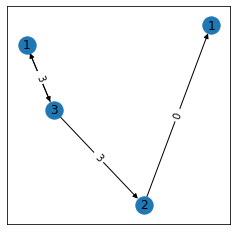

where: [3, 11, 12, 14, 16, 18, 19, 21, 22, 26, 30, 31, 35, 36, 37, 40, 41, 45, 46, 48, 53, 55, 59, 63, 64, 65, 67, 68, 69, 70, 73, 75, 76, 77, 78, 79, 80, 82, 84, 88, 89, 91, 92, 94, 97, 99, 101, 104, 107, 109, 110, 112, 113, 115, 119, 123, 124, 125, 126, 130, 131, 132, 136, 138, 140, 141, 146, 147, 148, 154, 157, 158, 160, 161, 162, 163, 164, 167, 168, 170, 173, 174, 175, 176, 182, 183, 184, 186, 187, 188, 192, 193, 197, 200, 201, 202, 204, 206, 210, 219, 220, 221, 222, 226, 227, 228, 229, 230, 231, 232, 233]

-----------------

t # 48
v 0 1
v 1 3
v 2 2
v 3 1
v 4 3
e 0 1 4
e 1 0 3
e 1 2 3
e 2 3 0
e 3 4 3

Support: 101


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


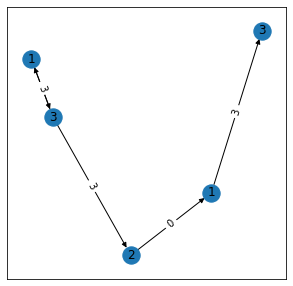

where: [3, 11, 12, 14, 18, 19, 21, 22, 26, 30, 31, 35, 36, 37, 40, 41, 45, 46, 48, 53, 55, 59, 63, 64, 68, 69, 70, 73, 75, 76, 78, 80, 82, 84, 88, 89, 91, 92, 94, 101, 104, 107, 109, 112, 113, 115, 119, 123, 124, 125, 126, 130, 131, 132, 136, 138, 140, 141, 146, 147, 148, 154, 157, 158, 160, 161, 162, 163, 164, 167, 168, 170, 173, 174, 175, 176, 182, 184, 186, 187, 188, 192, 193, 197, 200, 201, 202, 204, 206, 210, 219, 220, 221, 226, 227, 228, 229, 230, 231, 232, 233]

-----------------

t # 49
v 0 1
v 1 3
v 2 2
v 3 1
v 4 1
e 0 1 4
e 1 0 3
e 1 2 3
e 2 3 0
e 2 4 4

Support: 101


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


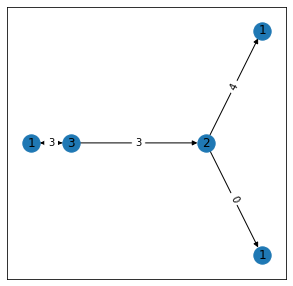

where: [3, 11, 12, 14, 16, 18, 19, 21, 22, 26, 30, 31, 35, 36, 37, 40, 41, 45, 46, 48, 53, 59, 63, 64, 65, 67, 68, 69, 70, 73, 75, 76, 77, 78, 80, 82, 84, 88, 91, 92, 94, 101, 104, 107, 109, 110, 112, 113, 115, 119, 123, 124, 125, 126, 130, 131, 132, 136, 138, 140, 146, 147, 148, 154, 157, 158, 160, 161, 162, 163, 164, 167, 170, 173, 174, 175, 176, 182, 184, 186, 187, 188, 192, 193, 197, 200, 204, 206, 210, 219, 220, 221, 222, 226, 227, 228, 229, 230, 231, 232, 233]

-----------------

t # 50
v 0 1
v 1 3
v 2 2
v 3 1
v 4 1
e 0 1 4
e 1 0 3
e 1 2 3
e 2 3 0
e 2 4 3

Support: 101


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


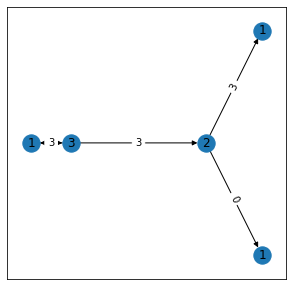

where: [3, 11, 12, 16, 18, 19, 21, 22, 26, 30, 35, 36, 37, 40, 41, 45, 46, 48, 53, 59, 63, 64, 65, 67, 68, 69, 70, 73, 75, 76, 77, 78, 79, 80, 82, 84, 88, 89, 91, 92, 94, 99, 101, 104, 107, 110, 112, 113, 115, 119, 123, 124, 125, 126, 130, 132, 136, 138, 140, 141, 146, 147, 148, 154, 157, 158, 160, 161, 162, 163, 164, 168, 170, 173, 174, 175, 176, 182, 184, 186, 187, 188, 192, 193, 197, 200, 201, 202, 204, 206, 210, 219, 220, 221, 222, 226, 228, 229, 230, 231, 233]

-----------------

t # 51
v 0 1
v 1 3
v 2 2
v 3 1
v 4 2
e 0 1 4
e 1 0 3
e 1 2 3
e 1 4 4
e 2 3 0

Support: 104


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


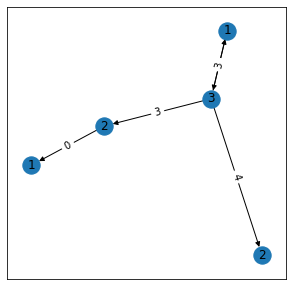

where: [3, 11, 12, 14, 16, 18, 19, 21, 22, 26, 30, 31, 35, 36, 37, 40, 41, 45, 48, 53, 55, 59, 63, 64, 65, 67, 69, 70, 73, 75, 76, 77, 78, 79, 80, 82, 84, 89, 91, 92, 94, 97, 99, 101, 104, 107, 109, 110, 112, 113, 115, 119, 123, 124, 125, 130, 131, 132, 136, 138, 140, 141, 146, 147, 148, 154, 157, 158, 160, 161, 162, 163, 168, 170, 173, 174, 175, 176, 182, 183, 184, 186, 187, 188, 192, 193, 197, 200, 201, 202, 204, 206, 210, 219, 220, 221, 222, 226, 227, 228, 230, 231, 232, 233]

-----------------

t # 52
v 0 1
v 1 3
v 2 2
v 3 1
v 4 2
e 0 1 4
e 1 0 3
e 1 2 3
e 2 3 0
e 3 4 4

Support: 102


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


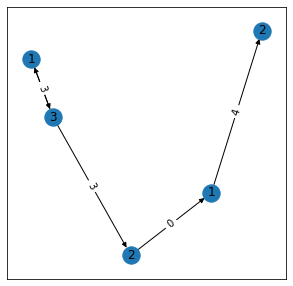

where: [3, 11, 12, 14, 16, 18, 19, 21, 22, 26, 30, 31, 35, 36, 37, 41, 45, 46, 48, 53, 55, 59, 63, 64, 65, 67, 68, 69, 70, 73, 75, 76, 78, 79, 80, 82, 84, 88, 89, 91, 92, 94, 99, 101, 104, 107, 109, 112, 113, 115, 119, 123, 124, 125, 126, 130, 131, 136, 138, 140, 141, 146, 147, 148, 154, 157, 158, 160, 161, 162, 163, 164, 167, 168, 170, 173, 174, 175, 176, 182, 183, 184, 186, 187, 188, 192, 193, 197, 200, 202, 204, 206, 210, 219, 221, 226, 228, 229, 230, 231, 232, 233]

-----------------

t # 53
v 0 1
v 1 3
v 2 2
v 3 1
e 0 1 4
e 1 0 3
e 1 2 3
e 2 3 3

Support: 102


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


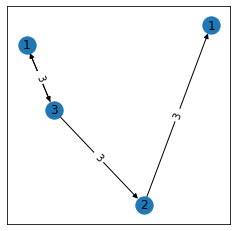

where: [3, 11, 12, 16, 18, 19, 21, 22, 26, 27, 30, 35, 36, 37, 40, 41, 45, 46, 48, 53, 59, 63, 64, 65, 67, 68, 69, 70, 73, 75, 76, 77, 78, 79, 80, 82, 84, 88, 89, 91, 92, 94, 99, 101, 104, 107, 110, 112, 113, 115, 119, 123, 124, 125, 126, 130, 132, 136, 138, 140, 141, 146, 147, 148, 154, 157, 158, 160, 161, 162, 163, 164, 168, 170, 173, 174, 175, 176, 182, 184, 186, 187, 188, 192, 193, 197, 200, 201, 202, 204, 206, 210, 219, 220, 221, 222, 226, 228, 229, 230, 231, 233]

-----------------

t # 54
v 0 1
v 1 3
v 2 2
v 3 2
e 0 1 4
e 1 0 3
e 1 2 3
e 1 3 4

Support: 105


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


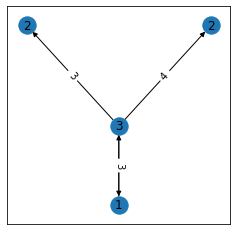

where: [3, 11, 12, 14, 16, 18, 19, 21, 22, 26, 27, 30, 31, 35, 36, 37, 40, 41, 45, 48, 53, 55, 59, 63, 64, 65, 67, 69, 70, 73, 75, 76, 77, 78, 79, 80, 82, 84, 89, 91, 92, 94, 97, 99, 101, 104, 107, 109, 110, 112, 113, 115, 119, 123, 124, 125, 130, 131, 132, 136, 138, 140, 141, 146, 147, 148, 154, 157, 158, 160, 161, 162, 163, 168, 170, 173, 174, 175, 176, 182, 183, 184, 186, 187, 188, 192, 193, 197, 200, 201, 202, 204, 206, 210, 219, 220, 221, 222, 226, 227, 228, 230, 231, 232, 233]

-----------------

t # 55
v 0 1
v 1 3
v 2 1
v 3 2
e 0 1 4
e 1 0 3
e 1 2 2
e 2 3 4

Support: 114


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


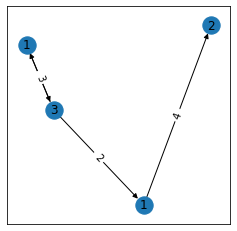

where: [3, 4, 11, 12, 14, 16, 18, 19, 21, 26, 30, 35, 36, 39, 40, 41, 46, 47, 48, 50, 53, 55, 57, 58, 59, 63, 64, 67, 68, 69, 72, 73, 75, 78, 80, 81, 84, 86, 87, 88, 89, 91, 92, 93, 94, 99, 101, 103, 106, 107, 109, 110, 112, 113, 115, 120, 123, 124, 125, 126, 130, 131, 132, 134, 135, 136, 140, 141, 143, 144, 146, 148, 152, 154, 157, 158, 160, 161, 162, 163, 168, 170, 173, 174, 175, 176, 181, 182, 183, 184, 186, 187, 188, 189, 193, 195, 197, 200, 204, 206, 210, 212, 217, 219, 220, 221, 222, 225, 226, 227, 228, 229, 230, 232]

-----------------

t # 56
v 0 1
v 1 3
v 2 1
v 3 2
v 4 2
e 0 1 4
e 1 0 3
e 1 2 2
e 1 4 4
e 2 3 4

Support: 107


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


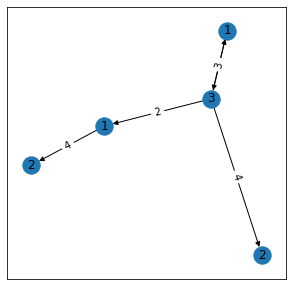

where: [3, 11, 12, 14, 16, 18, 19, 21, 26, 30, 35, 36, 39, 40, 41, 47, 48, 50, 53, 55, 57, 58, 59, 63, 64, 67, 69, 72, 73, 75, 78, 80, 81, 84, 86, 87, 89, 91, 92, 93, 94, 99, 101, 103, 106, 107, 109, 110, 112, 113, 115, 120, 123, 124, 125, 130, 131, 132, 134, 135, 136, 140, 141, 144, 146, 148, 152, 154, 157, 158, 160, 161, 162, 163, 168, 170, 173, 174, 175, 176, 181, 182, 183, 184, 186, 187, 188, 189, 193, 195, 197, 200, 204, 206, 210, 212, 217, 219, 220, 221, 222, 225, 226, 227, 228, 230, 232]

-----------------

t # 57
v 0 1
v 1 3
v 2 1
v 3 2
v 4 2
v 5 3
e 0 1 4
e 1 0 3
e 1 2 2
e 1 4 4
e 2 3 4
e 4 5 2

Support: 102


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


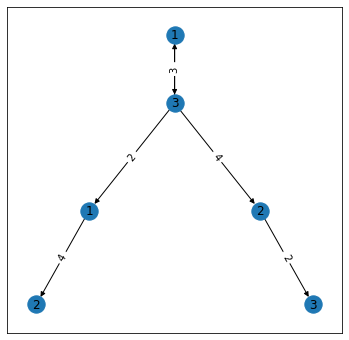

where: [3, 11, 12, 14, 18, 19, 21, 26, 30, 35, 36, 39, 40, 41, 47, 48, 50, 53, 55, 57, 58, 59, 63, 64, 67, 69, 72, 73, 75, 78, 80, 84, 86, 87, 91, 92, 93, 94, 99, 101, 103, 106, 107, 109, 110, 112, 113, 115, 120, 123, 124, 125, 130, 131, 132, 134, 135, 136, 140, 141, 144, 146, 148, 152, 154, 157, 158, 160, 161, 162, 163, 170, 173, 174, 175, 181, 182, 183, 184, 186, 187, 188, 189, 193, 195, 197, 200, 204, 206, 210, 212, 217, 219, 220, 221, 222, 225, 226, 227, 228, 230, 232]

-----------------

t # 58
v 0 1
v 1 3
v 2 1
v 3 1
e 0 1 4
e 1 0 3
e 1 2 2
e 2 3 0

Support: 108


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


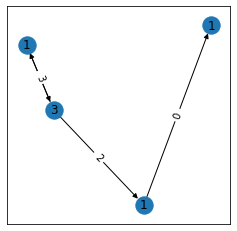

where: [3, 4, 11, 14, 16, 18, 19, 21, 22, 26, 30, 35, 36, 39, 40, 41, 46, 47, 48, 50, 53, 55, 57, 59, 63, 64, 67, 68, 69, 72, 73, 75, 80, 81, 84, 86, 87, 88, 89, 91, 92, 93, 94, 99, 101, 103, 106, 107, 110, 112, 113, 115, 123, 124, 125, 126, 130, 131, 132, 134, 135, 136, 140, 141, 143, 144, 146, 148, 152, 154, 157, 158, 160, 161, 162, 163, 167, 168, 173, 174, 175, 176, 181, 182, 183, 184, 186, 187, 188, 189, 193, 195, 197, 204, 206, 212, 217, 219, 220, 221, 222, 225, 226, 227, 228, 229, 230, 232]

-----------------

t # 59
v 0 1
v 1 3
v 2 1
v 3 1
v 4 2
e 0 1 4
e 1 0 3
e 1 2 2
e 1 4 4
e 2 3 0

Support: 100


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


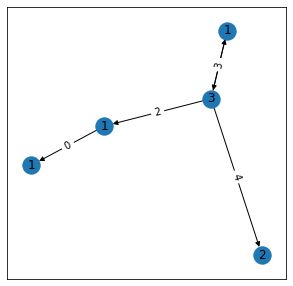

where: [3, 11, 14, 16, 18, 19, 21, 22, 26, 30, 35, 36, 39, 40, 41, 47, 48, 50, 53, 55, 57, 59, 63, 64, 67, 69, 72, 73, 75, 80, 81, 84, 86, 87, 89, 91, 92, 93, 94, 99, 101, 103, 106, 107, 110, 112, 113, 115, 123, 124, 125, 130, 131, 132, 134, 135, 136, 140, 141, 144, 146, 148, 152, 154, 157, 158, 160, 161, 162, 163, 168, 173, 174, 175, 176, 181, 182, 183, 184, 186, 187, 188, 189, 193, 195, 197, 204, 206, 212, 217, 219, 220, 221, 222, 225, 226, 227, 228, 230, 232]

-----------------

t # 60
v 0 1
v 1 3
v 2 1
v 3 2
e 0 1 4
e 1 0 3
e 1 2 2
e 1 3 4

Support: 108


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


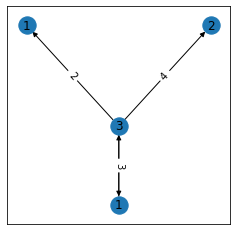

where: [3, 11, 12, 14, 16, 18, 19, 21, 22, 26, 30, 35, 36, 39, 40, 41, 47, 48, 50, 53, 55, 57, 58, 59, 63, 64, 67, 69, 72, 73, 75, 78, 80, 81, 84, 86, 87, 89, 91, 92, 93, 94, 99, 101, 103, 106, 107, 109, 110, 112, 113, 115, 120, 123, 124, 125, 130, 131, 132, 134, 135, 136, 140, 141, 144, 146, 148, 152, 154, 157, 158, 160, 161, 162, 163, 168, 170, 173, 174, 175, 176, 181, 182, 183, 184, 186, 187, 188, 189, 193, 195, 197, 200, 204, 206, 210, 212, 217, 219, 220, 221, 222, 225, 226, 227, 228, 230, 232]

-----------------

t # 61
v 0 1
v 1 3
v 2 1
v 3 2
v 4 3
e 0 1 4
e 1 0 3
e 1 2 2
e 1 3 4
e 3 4 2

Support: 103


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


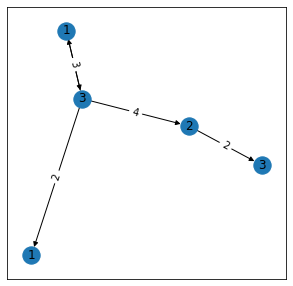

where: [3, 11, 12, 14, 18, 19, 21, 22, 26, 30, 35, 36, 39, 40, 41, 47, 48, 50, 53, 55, 57, 58, 59, 63, 64, 67, 69, 72, 73, 75, 78, 80, 84, 86, 87, 91, 92, 93, 94, 99, 101, 103, 106, 107, 109, 110, 112, 113, 115, 120, 123, 124, 125, 130, 131, 132, 134, 135, 136, 140, 141, 144, 146, 148, 152, 154, 157, 158, 160, 161, 162, 163, 170, 173, 174, 175, 181, 182, 183, 184, 186, 187, 188, 189, 193, 195, 197, 200, 204, 206, 210, 212, 217, 219, 220, 221, 222, 225, 226, 227, 228, 230, 232]

-----------------

t # 62
v 0 1
v 1 3
v 2 1
v 3 1
e 0 1 4
e 1 0 3
e 1 2 3
e 2 3 4

Support: 100


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


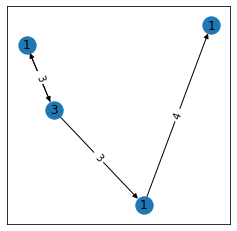

where: [3, 4, 11, 14, 15, 18, 19, 22, 26, 30, 31, 33, 35, 38, 39, 40, 41, 45, 46, 48, 53, 57, 59, 63, 64, 65, 69, 72, 73, 75, 76, 77, 79, 81, 82, 86, 87, 89, 91, 92, 101, 103, 107, 109, 110, 113, 115, 118, 119, 129, 130, 131, 132, 134, 135, 136, 138, 140, 143, 144, 146, 148, 151, 157, 160, 161, 162, 163, 167, 170, 173, 174, 176, 181, 182, 183, 184, 186, 187, 188, 193, 195, 197, 199, 200, 202, 204, 206, 212, 217, 219, 221, 222, 226, 227, 228, 229, 230, 231, 232]

-----------------

t # 63
v 0 1
v 1 3
v 2 1
v 3 3
e 0 1 4
e 1 0 3
e 1 2 3
e 2 3 2

Support: 102


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


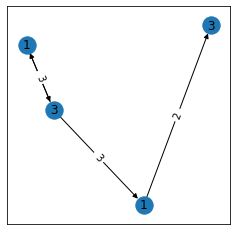

where: [3, 11, 14, 15, 19, 22, 26, 27, 30, 31, 33, 37, 38, 39, 41, 46, 47, 48, 53, 57, 59, 63, 64, 65, 72, 73, 75, 76, 77, 81, 82, 84, 87, 89, 91, 92, 94, 97, 99, 101, 103, 107, 109, 110, 112, 113, 115, 118, 119, 123, 126, 129, 130, 132, 134, 135, 136, 138, 140, 143, 144, 146, 148, 151, 157, 160, 161, 162, 163, 164, 167, 170, 173, 175, 176, 181, 182, 183, 184, 185, 186, 187, 188, 192, 193, 195, 197, 200, 202, 204, 212, 219, 220, 221, 225, 226, 227, 228, 230, 231, 232, 233]

-----------------

t # 64
v 0 1
v 1 3
v 2 1
v 3 2
e 0 1 4
e 1 0 3
e 1 2 3
e 1 3 4

Support: 119


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


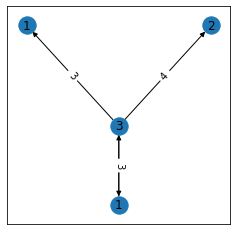

where: [3, 11, 14, 15, 16, 18, 19, 22, 26, 27, 30, 31, 33, 35, 37, 38, 39, 40, 41, 45, 47, 48, 53, 57, 59, 63, 64, 65, 67, 69, 72, 73, 75, 76, 77, 79, 81, 82, 84, 86, 87, 89, 91, 92, 94, 97, 99, 101, 103, 107, 109, 110, 112, 113, 115, 118, 119, 123, 125, 129, 130, 131, 132, 134, 135, 136, 138, 140, 141, 144, 146, 148, 151, 157, 158, 159, 160, 161, 162, 163, 168, 170, 173, 174, 175, 176, 181, 182, 183, 184, 185, 186, 187, 188, 192, 193, 195, 197, 199, 200, 201, 202, 204, 206, 210, 212, 217, 219, 220, 221, 222, 225, 226, 227, 228, 230, 231, 232, 233]

-----------------

t # 65
v 0 1
v 1 3
v 2 1
v 3 2
v 4 3
e 0 1 4
e 1 0 3
e 1 2 3
e 1 3 4
e 3 4 2

Support: 111


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


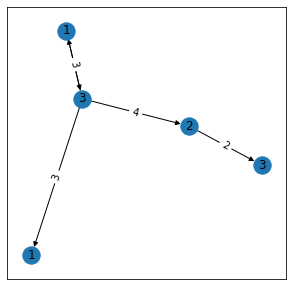

where: [3, 11, 14, 18, 19, 22, 26, 27, 30, 31, 33, 35, 37, 38, 39, 40, 41, 47, 48, 53, 57, 59, 63, 64, 67, 69, 72, 73, 75, 76, 77, 79, 82, 84, 86, 87, 91, 92, 94, 97, 99, 101, 103, 107, 109, 110, 112, 113, 115, 118, 119, 123, 125, 129, 130, 131, 132, 134, 135, 136, 138, 140, 141, 144, 146, 148, 151, 157, 158, 159, 160, 161, 162, 163, 170, 173, 174, 175, 181, 182, 183, 184, 185, 186, 187, 188, 192, 193, 195, 197, 199, 200, 201, 202, 204, 206, 210, 212, 217, 219, 220, 221, 222, 225, 226, 227, 228, 230, 231, 232, 233]

-----------------

t # 66
v 0 1
v 1 3
v 2 1
v 3 2
v 4 3
v 5 3
e 0 1 4
e 1 0 3
e 1 2 3
e 1 3 4
e 3 4 2
e 4 5 3

Support: 100


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


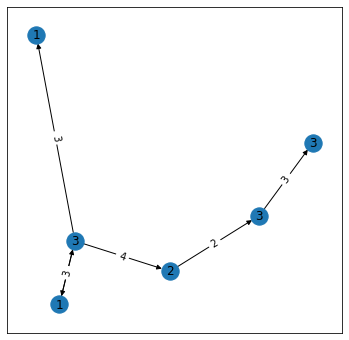

where: [3, 11, 14, 18, 19, 22, 26, 27, 30, 31, 35, 37, 38, 39, 40, 41, 53, 59, 63, 64, 69, 73, 75, 76, 77, 79, 82, 84, 86, 87, 91, 92, 94, 97, 99, 101, 103, 107, 109, 110, 112, 115, 119, 123, 125, 129, 130, 131, 132, 134, 135, 136, 138, 140, 141, 144, 146, 148, 151, 157, 158, 159, 160, 161, 162, 163, 173, 174, 175, 181, 182, 184, 185, 186, 187, 188, 192, 193, 195, 197, 199, 200, 201, 202, 204, 206, 210, 212, 217, 219, 221, 222, 225, 226, 227, 228, 230, 231, 232, 233]

-----------------

t # 67
v 0 1
v 1 3
v 2 1
v 3 2
v 4 3
v 5 1
e 0 1 4
e 1 0 3
e 1 2 3
e 1 3 4
e 3 4 2
e 4 5 1

Support: 103


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


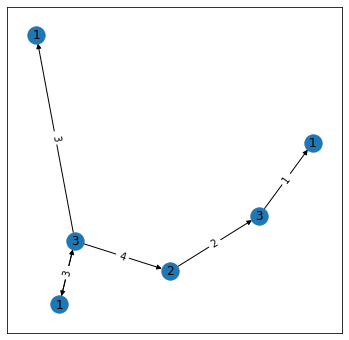

where: [3, 11, 14, 18, 19, 22, 26, 27, 30, 31, 33, 35, 37, 38, 39, 40, 41, 47, 53, 57, 59, 63, 64, 67, 69, 72, 73, 75, 76, 79, 82, 84, 86, 87, 91, 92, 94, 97, 99, 101, 103, 109, 112, 115, 118, 119, 123, 125, 129, 130, 131, 132, 134, 135, 136, 138, 140, 141, 144, 146, 151, 157, 158, 159, 160, 161, 162, 163, 173, 174, 175, 181, 182, 183, 184, 186, 187, 188, 192, 193, 195, 197, 199, 200, 201, 202, 204, 206, 210, 212, 217, 219, 220, 221, 222, 225, 226, 227, 228, 230, 231, 232, 233]

-----------------

t # 68
v 0 1
v 1 3
v 2 1
v 3 3
e 0 1 4
e 1 0 3
e 1 2 3
e 1 3 4

Support: 101


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


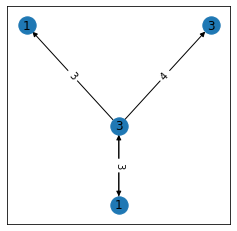

where: [3, 4, 11, 14, 15, 16, 19, 22, 26, 27, 30, 31, 35, 37, 39, 40, 41, 45, 46, 48, 53, 59, 63, 64, 65, 67, 69, 73, 75, 76, 77, 79, 81, 82, 84, 89, 91, 92, 94, 97, 99, 103, 107, 109, 110, 112, 113, 115, 119, 125, 126, 129, 130, 131, 132, 134, 135, 136, 138, 140, 141, 146, 148, 151, 157, 158, 159, 160, 161, 162, 163, 170, 173, 174, 176, 182, 183, 184, 185, 186, 187, 192, 193, 197, 199, 201, 204, 206, 210, 212, 217, 219, 221, 222, 226, 227, 228, 230, 231, 232, 233]

-----------------

t # 69
v 0 1
v 1 3
v 2 1
v 3 3
e 0 1 4
e 1 0 3
e 1 2 3
e 1 3 5

Support: 101


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


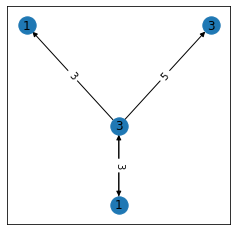

where: [3, 4, 11, 14, 16, 18, 22, 26, 30, 31, 33, 35, 39, 45, 46, 53, 57, 59, 63, 64, 67, 69, 72, 73, 75, 76, 77, 79, 81, 82, 84, 86, 87, 89, 91, 92, 94, 97, 99, 103, 107, 109, 110, 112, 115, 118, 119, 125, 129, 130, 132, 134, 135, 136, 141, 143, 144, 146, 151, 158, 159, 160, 161, 162, 163, 167, 170, 173, 174, 175, 176, 181, 182, 183, 184, 185, 186, 187, 188, 193, 195, 197, 200, 204, 206, 210, 212, 217, 219, 220, 221, 222, 225, 226, 227, 228, 229, 230, 231, 232, 233]

-----------------

t # 70
v 0 1
v 1 3
v 2 1
v 3 2
e 0 1 4
e 1 0 3
e 1 2 3
e 2 3 5

Support: 112


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


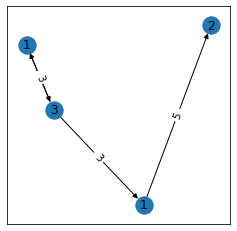

where: [4, 14, 15, 16, 18, 19, 22, 26, 27, 30, 31, 33, 35, 38, 39, 40, 41, 45, 46, 47, 48, 53, 57, 59, 63, 64, 67, 69, 72, 73, 75, 76, 77, 79, 81, 82, 84, 86, 87, 89, 91, 92, 94, 97, 99, 103, 107, 109, 110, 112, 113, 115, 119, 123, 125, 129, 130, 131, 132, 134, 135, 136, 138, 140, 141, 143, 146, 148, 151, 158, 160, 161, 162, 163, 164, 167, 168, 170, 173, 174, 181, 182, 183, 185, 186, 187, 188, 192, 193, 195, 197, 199, 200, 201, 202, 204, 206, 210, 212, 217, 220, 221, 222, 225, 226, 227, 228, 229, 230, 231, 232, 233]

-----------------

t # 71
v 0 1
v 1 3
v 2 1
v 3 2
v 4 3
e 0 1 4
e 1 0 3
e 1 2 3
e 2 3 5
e 3 4 4

Support: 108


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


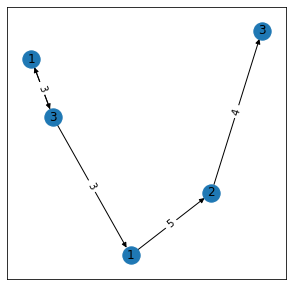

where: [4, 14, 15, 16, 18, 19, 22, 26, 27, 30, 31, 33, 35, 38, 39, 40, 41, 45, 46, 48, 53, 57, 59, 63, 64, 67, 69, 73, 75, 76, 77, 79, 81, 82, 84, 86, 87, 91, 92, 94, 97, 99, 103, 107, 109, 110, 112, 113, 115, 119, 123, 125, 129, 130, 131, 132, 134, 135, 136, 138, 140, 141, 143, 146, 148, 151, 158, 160, 161, 162, 163, 164, 167, 170, 173, 174, 181, 182, 183, 185, 186, 187, 188, 192, 193, 195, 197, 199, 200, 201, 202, 204, 206, 210, 212, 217, 220, 221, 222, 225, 226, 227, 228, 229, 230, 231, 232, 233]

-----------------

t # 72
v 0 1
v 1 3
v 2 1
v 3 2
v 4 3
v 5 3
e 0 1 4
e 1 0 3
e 1 2 3
e 2 3 5
e 3 4 4
e 3 5 4

Support: 100


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


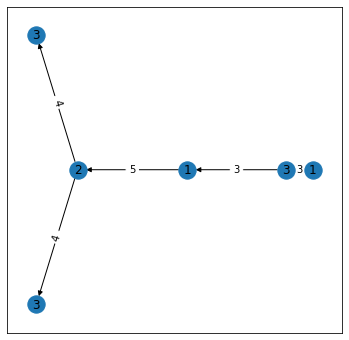

where: [4, 14, 15, 16, 18, 19, 22, 26, 27, 30, 31, 33, 35, 38, 39, 40, 41, 48, 53, 57, 59, 63, 64, 67, 73, 75, 76, 77, 79, 81, 82, 84, 86, 87, 91, 92, 97, 99, 103, 107, 109, 110, 112, 113, 115, 119, 123, 125, 129, 130, 132, 134, 135, 136, 138, 140, 141, 143, 146, 148, 151, 158, 160, 161, 162, 163, 167, 170, 173, 174, 181, 182, 183, 185, 186, 188, 192, 193, 195, 197, 199, 200, 201, 202, 204, 206, 210, 217, 220, 221, 222, 225, 226, 227, 228, 229, 230, 231, 232, 233]

-----------------

t # 73
v 0 1
v 1 3
v 2 1
v 3 2
v 4 3
v 5 1
e 0 1 4
e 1 0 3
e 1 2 3
e 2 3 5
e 3 4 4
e 4 5 3

Support: 103


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


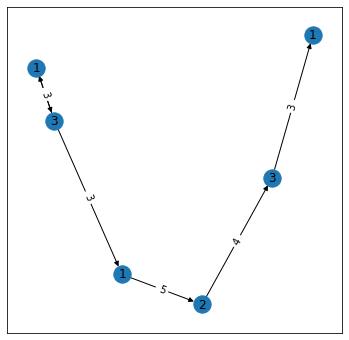

where: [4, 14, 15, 16, 18, 19, 22, 26, 27, 30, 31, 33, 35, 38, 39, 40, 41, 45, 48, 53, 57, 59, 63, 64, 67, 69, 73, 75, 76, 77, 79, 82, 84, 86, 87, 91, 94, 97, 99, 103, 107, 109, 110, 112, 113, 115, 119, 123, 125, 129, 130, 131, 132, 134, 135, 136, 138, 140, 141, 143, 146, 148, 151, 158, 160, 161, 162, 163, 167, 170, 173, 174, 181, 182, 183, 185, 186, 187, 188, 192, 193, 195, 197, 199, 200, 201, 202, 204, 206, 210, 212, 217, 220, 221, 222, 225, 226, 227, 229, 230, 231, 232, 233]

-----------------

t # 74
v 0 1
v 1 3
v 2 1
v 3 2
v 4 3
v 5 1
v 6 3
e 0 1 4
e 1 0 3
e 1 2 3
e 2 3 5
e 3 4 4
e 4 5 3
e 4 6 3

Support: 101


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


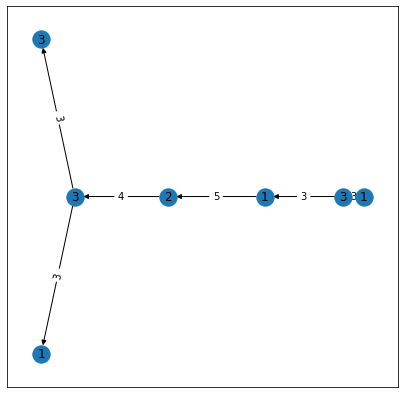

where: [4, 14, 15, 16, 18, 19, 22, 26, 27, 30, 31, 33, 35, 38, 39, 40, 41, 45, 48, 53, 57, 59, 63, 64, 69, 73, 75, 76, 77, 79, 82, 84, 86, 87, 91, 94, 97, 99, 103, 107, 109, 110, 112, 113, 115, 119, 123, 125, 129, 130, 131, 132, 134, 135, 136, 138, 140, 141, 143, 146, 148, 151, 158, 160, 161, 162, 163, 167, 170, 173, 174, 181, 182, 183, 185, 186, 187, 188, 192, 193, 195, 197, 199, 200, 201, 202, 204, 206, 210, 212, 217, 221, 222, 225, 226, 227, 229, 230, 231, 232, 233]

-----------------

t # 75
v 0 1
v 1 3
v 2 1
v 3 2
v 4 3
v 5 3
e 0 1 4
e 1 0 3
e 1 2 3
e 2 3 5
e 3 4 4
e 4 5 3

Support: 104


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


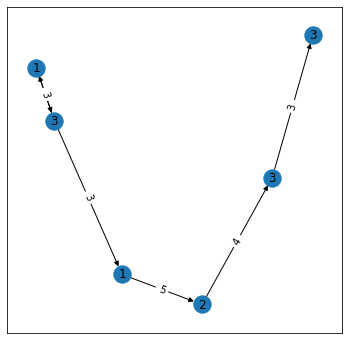

where: [4, 14, 15, 16, 18, 19, 22, 26, 27, 30, 31, 33, 35, 38, 39, 40, 41, 45, 48, 53, 57, 59, 63, 64, 69, 73, 75, 76, 77, 79, 81, 82, 84, 86, 87, 91, 92, 94, 97, 99, 103, 107, 109, 110, 112, 113, 115, 119, 123, 125, 129, 130, 131, 132, 134, 135, 136, 138, 140, 141, 143, 146, 148, 151, 158, 160, 161, 162, 163, 167, 170, 173, 174, 181, 182, 183, 185, 186, 187, 188, 192, 193, 195, 197, 199, 200, 201, 202, 204, 206, 210, 212, 217, 221, 222, 225, 226, 227, 228, 229, 230, 231, 232, 233]

-----------------

t # 76
v 0 1
v 1 3
v 2 1
v 3 2
v 4 3
v 5 3
v 6 2
e 0 1 4
e 1 0 3
e 1 2 3
e 1 6 4
e 2 3 5
e 3 4 4
e 4 5 3

Support: 100


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


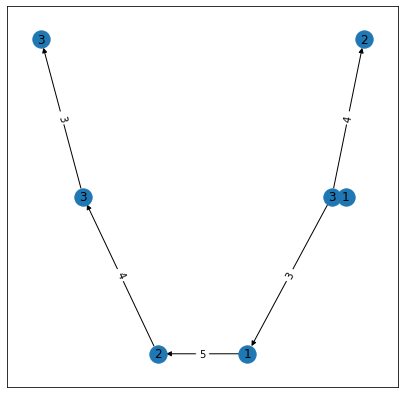

where: [14, 15, 16, 18, 19, 22, 26, 27, 30, 31, 33, 35, 38, 39, 40, 41, 45, 48, 53, 57, 59, 63, 64, 69, 73, 75, 76, 77, 79, 81, 82, 84, 86, 87, 91, 92, 94, 97, 99, 103, 107, 109, 110, 112, 113, 115, 119, 123, 125, 129, 130, 131, 132, 134, 135, 136, 138, 140, 141, 146, 148, 151, 158, 160, 161, 162, 163, 170, 173, 174, 181, 182, 183, 185, 186, 187, 188, 192, 193, 195, 197, 199, 200, 201, 202, 204, 206, 210, 212, 217, 221, 222, 225, 226, 227, 228, 230, 231, 232, 233]

-----------------

t # 77
v 0 1
v 1 3
v 2 1
v 3 2
v 4 3
v 5 2
e 0 1 4
e 1 0 3
e 1 2 3
e 1 5 4
e 2 3 5
e 3 4 4

Support: 102


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


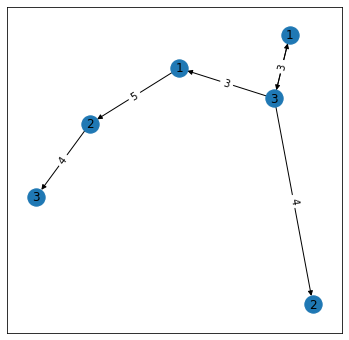

where: [14, 15, 16, 18, 19, 22, 26, 27, 30, 31, 33, 35, 38, 39, 40, 41, 45, 48, 53, 57, 59, 63, 64, 67, 69, 73, 75, 76, 77, 79, 81, 82, 84, 86, 87, 91, 92, 94, 97, 99, 103, 107, 109, 110, 112, 113, 115, 119, 123, 125, 129, 130, 131, 132, 134, 135, 136, 138, 140, 141, 146, 148, 151, 158, 160, 161, 162, 163, 170, 173, 174, 181, 182, 183, 185, 186, 187, 188, 192, 193, 195, 197, 199, 200, 201, 202, 204, 206, 210, 212, 217, 220, 221, 222, 225, 226, 227, 228, 230, 231, 232, 233]

-----------------

t # 78
v 0 1
v 1 3
v 2 1
v 3 2
v 4 2
e 0 1 4
e 1 0 3
e 1 2 3
e 1 4 4
e 2 3 5

Support: 106


/Users/tangting/Project/gSpan/ceb_gspan_mining/ceb_gspan.py:439: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._report_df = self._report_df.append(


KeyboardInterrupt: 

In [2]:
from gspan_mining.config import parser
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
from random import random
import sys

from ceb_gspan_mining.config import parser
from ceb_gspan_mining.ceb_gspan import gSpan

import numpy as np
import pandas as pd


import random 
def main(FLAGS=None):
    """Run gSpan."""

    if FLAGS is None:
        FLAGS, _ = parser.parse_known_args(args=["graphdata/graph.data.5"])

    if not os.path.exists(FLAGS.database_file_name):
        print('{} does not exist.'.format(FLAGS.database_file_name))
        sys.exit()

    graph_dict = {"group_id":"graph_id","vertex_id":"id","edge_src":"src_id","edge_dst":"dst_id","origin_id":"origin_id"}
    # graph_dict =  {"group_id":"graph_id","vertex_id":"id","edge_src":"src","edge_dst":"dst"}
    gs = gSpan(
        database_file_name=FLAGS.database_file_name,
        min_support=FLAGS.min_support,
        min_num_vertices=FLAGS.lower_bound_of_num_vertices,
        max_num_vertices=FLAGS.upper_bound_of_num_vertices,
        max_ngraphs=FLAGS.num_graphs,
        is_undirected=(not FLAGS.directed),
        verbose=FLAGS.verbose,
        visualize=FLAGS.plot,
        where=FLAGS.where,
        check_featureblack = FLAGS.check_featureblack,
        graph_dict = graph_dict
    )

    gs.run()
    gs.time_stats()

    
    return gs


if __name__ == '__main__':
    args_str = '--min_support 100 --directed True --lower_bound_of_num_vertices 4 --plot True --where True --check_featureblack True graphdata/'
    FLAGS, _ = parser.parse_known_args(args=args_str.split())
    main(FLAGS)


1

# Other

In [15]:
graph_id = graph_dict['group_id']
vertex_id = graph_dict['vertex_id']
edge_src = graph_dict['edge_src']
edge_dst = graph_dict['edge_dst']

edges = pd.read_csv(database_file_name+"/edges.csv", sep=',')
vertexes = pd.read_csv(database_file_name+"/vertexes.csv", sep=',')
vertexes.fillna(0)
vertexes.rename(columns={graph_id: 'group_id', vertex_id: "vertex_id"}, inplace=True)

vertexes["node_label_change"] = vertexes["node_label_1"] * 2+vertexes["node_label_0"]

edges.rename(columns={edge_src: 'edge_src',
                edge_dst: "edge_dst"}, inplace=True)

graphs = vertexes["group_id"].drop_duplicates()
graphs_len = len(graphs)
for i in tqdm(range(graphs_len)):
    g_id = graphs.iloc[i]
    vertexes_pd = vertexes[vertexes.group_id == g_id]
    mask = edges[edges.edge_src.isin(vertexes_pd["vertex_id"])
                        & edges.edge_dst.isin(vertexes_pd["vertex_id"])].index
    edges.loc[mask,"group_id"] =  g_id
    edges.loc[mask,"e_id"] =  [i for i in range(len(mask))]

NameError: name 'graph_dict' is not defined

vertexes

In [127]:
# vertexes
# edges
edges_src = pd.merge(edges,vertexes[["group_id","vertex_id","node_label_change"]],how="left",left_on="edge_src",right_on="vertex_id")

# .merge(vertexes,how="left",left_on="edge_dst",right_on="vertex_id") 
edges_src.rename(columns={"group_id":"group_id_a","vertex_id":"vertex_id_a","node_label_change":"node_label_change_a"},inplace=True)
edges_src = edges_src[edges_src.group_id_x==edges_src.group_id_y]

edges_dst = edges_src.merge(vertexes[["group_id","vertex_id","node_label_change"]],how="left",left_on="edge_dst",right_on="vertex_id")
edges_dst.rename(columns={"group_id":"group_id_b","vertex_id":"vertex_id_b","node_label_change":"node_label_change_b"},inplace=True)
edges_dst = edges_dst[edges_dst.group_id_x==edges_dst.group_id_b]

edges_final = edges_dst[["edge_src", 'edge_dst', 'edge_type', 'group_id_x', 'e_id',
        'node_label_change_a',  'node_label_change_b']]

In [137]:

vlb_counter = vertexes.groupby("node_label_change")["vertex_id"]
vlb_counted = vertexes.groupby(["node_label_change","group_id"])["vertex_id"]

In [138]:
vevlb_counter = edges_final.groupby(["node_label_change_a","edge_type","node_label_change_b"])["e_id"]
vevlb_counted = edges_final.groupby(["group_id_x","node_label_change_a","edge_type","node_label_change_b"])["e_id"]

In [146]:
b = vevlb_counter.count().reset_index()
# b

get_forward_root_edges result

In [147]:
get_forward_first = edges_final[edges_final.edge_src<edges_final.edge_dst]


In [148]:
# vevlb:(v.vlb, e.elb, g.vertices[e.to].vlb) , 
# projected:PDFS(gid, e, None)

get_forward_first_start = get_forward_first[get_forward_first.node_label_change_a==1]
get_forward_first_start["frm"] = 0
get_forward_first_start["to"] = 1



,edge_src,edge_dst,edge_type,group_id_x,e_id,node_label_change_a,node_label_change_b
1,22,26,3,20.0,0.0,3,1
3,11,18,1,10.0,0.0,0,1
6,23,30,5,0.0,3.0,1,3
10,9,12,4,0.0,5.0,1,0
13,23,24,2,20.0,2.0,2,3
...,...,...,...,...,...,...,...
84066,4925,4934,0,490.0,2968.0,3,2
84067,498,4946,1,490.0,2969.0,3,2
84070,4912,4934,1,490.0,2972.0,3,2
84071,498,4935,3,490.0,2973.0,3,3


In [63]:
edges

,Unnamed: 0,edge_src,edge_dst,edge_type,group_id,e_id
0,0,112,134,4,0,NaN
1,1,158,121,3,0,NaN
2,2,150,148,2,0,NaN
3,3,117,13,3,0,NaN
4,4,125,150,2,0,NaN
...,...,...,...,...,...,...
57634,57634,4934,4937,0,64,64.0
57635,57635,4923,498,0,65,65.0
57636,57636,4916,495,1,66,66.0
57637,57637,497,4932,2,67,67.0
